# Exploratory Data Analysis

## List of contents

+ Notebook set up 
+ [The International Stroke Trial](#the-international-stroke-trial)
    + Treatment
+ [The participants](#the-participants)
    + Age and sex
    + Health status at randomization
    + Diagnosis
+ Information after 14 days
    + Recurrent Stroke
    + State of discharge and place of discharge
    + Death and cause of death
+ Information after 6 months
    + Current status
    + Death and cause of death




-------

## Notebook set up

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as pat

In [4]:
df = pd.read_csv('data/IST_corrected_clean.csv',  index_col= [0])


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18779 entries, 0 to 19434
Columns: 113 entries, HOSPNUM to RDISCH14
dtypes: float64(16), int64(29), object(68)
memory usage: 16.3+ MB


In [6]:
# setting figuresize and label size globally
plt.rcParams['figure.figsize']=(12,8)
plt.rcParams['font.size']=14

sns.set_theme(palette = 'pastel', 
              font_scale=1.25)

In [7]:
# extracting info from categorical variables
age = df.AGE_bin.sort_values().unique().tolist()
diagstr = df.DIAGSTR.unique().tolist()
stype = df.STYPE.unique().tolist()
rdisch14 = df.RDISCH14.unique().tolist()
occode = df.OCCODE.unique().tolist()

In [8]:
# defining color schemes for categories
age_colors=['#c6dbef', '#9ecae1', '#6baed6', '#3182bd', '#08519c'] # blue-ish
COLOR_AGE = dict(zip(age, age_colors))
COLOR_SEX = {'F':'#a1dab4', 'M':'#2c7fb8'} #
COLOR_RATRIAL = {'Y':'#67a9cf', 'N':'#02818a'} 
diagstr_colors = ['#dd1c77', '#c994c7', '#e7e1ef']
COLOR_DIAGSTR = dict(zip(diagstr, diagstr_colors))
diagstr_colors = ['#e7e1ef', '#c994c7', '#dd1c77']
COLOR_RDISCH14 = dict(zip(rdisch14, diagstr_colors))
stype_colors = ['#f2f0f7', '#cbc9e2', '#9e9ac8', '#756bb1', '#54278f'] # violet-ish
COLOR_STYPE = dict(zip(stype, stype_colors))
occode_colors = ['#fee5d9', '#fcae91', '#fb6a4a', '#de2d26', '#a50f15']
COLOR_OCCODE = dict(zip(occode, occode_colors))

In [9]:
#df.head()

------

## Stroke

A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes. A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications. Effective treatments can also help prevent disability from stroke.

There are **two main causes of stroke**: a blocked artery (ischaemic stroke) or leaking or bursting of a blood vessel (haemorrhagic stroke). Some people may have only a temporary disruption of blood flow to the brain, known as a transient ischaemic attack (TIA), that doesn't cause lasting symptoms.

[source](https://www.mayoclinic.org/diseases-conditions/stroke/symptoms-causes/syc-20350113)

-----

## The International Stroke Trial

The International Stroke Trial (IST) was conducted from 1991 to 1996. The randomized, open trial of up to 14 days of antithrombotic therapy started as soon as possible after stroke onset. The aim was to provide reliable evidence on the safety and efficacy of aspirin and of subcutaneous heparin. 

The majority of the data was collected in 1994 and 1995. 

[Text(0.5, 0, 'Years of data collection (YY)')]

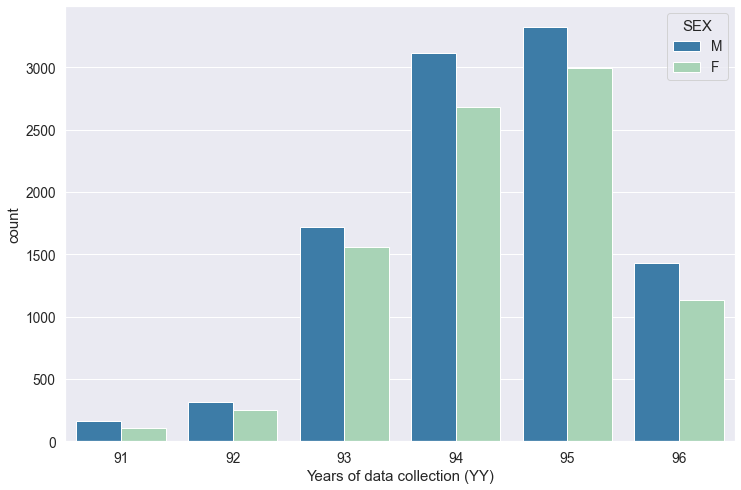

In [10]:
sns.countplot(x = df.RYEAR, hue = df.SEX, palette = COLOR_SEX).set(xlabel='Years of data collection (YY)')

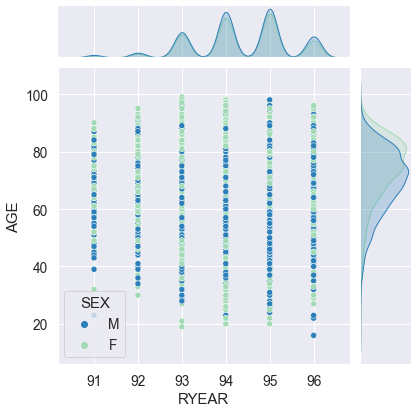

In [11]:
sns.jointplot(x = df.RYEAR, y = df.AGE, hue = df.SEX, kind = 'scatter', palette = COLOR_SEX)

The data was collected worldwide. Though, most patients were from the UK or Italy. 

In [12]:
df.groupby(['COUNTRY_ISO', 'SEX']).size().unstack(fill_value=0)

SEX             F     M
COUNTRY_ISO            
AR            201   301
AT            136    88
AU            234   345
BE            163   131
BR             32    43
CA             49    67
CH            759   811
CL             24    32
CZ            213   250
DK             12    21
ES            205   253
FI             32    52
FR              1     1
GB           2928  3127
GR             56    91
HK             50    57
HU             52    51
IE             26    31
IL             47    59
IN             62   140
IT           1473  1887
JP              4     4
LK              7    13
NL            329   365
NO            237   281
NZ            212   220
PL            364   378
PT            170   242
RO              8    10
SE            279   333
SG             59    77
SI             23    30
SK             40    43
TR            136   136
USA            69    57
ZA             27    33

Overall, 461 hospitals participated in the trial.

In [13]:
df.HOSPNUM.nunique()

461

### Treatment

Half the patients were allocated unfractionated heparin (5000 or 12,500 IU twice daily), and half were allocated "avoid heparin"; and, in a factorial design, half were allocated aspirin 300 mg daily and half "avoid aspirin".

Aspirin | | Avoid Aspirin
:------- | --- | :----
Aspirin (300 mg daily) | -- | Control
Aspirin + Low Heparin | -- | Low Heparin (5000 IU twice daily)
Aspirin + Medium Heparin | -- | Medium Heparin (12,500 IU twice daily)

Patients within the trial took the prescribed medicine for 14 days. After 14 days (of radnomization) medical staff filled out a discharge form to collect information of the current status of the patient. This form was filled out sooner if the patients was discharged sooner, transferred to another hospital or passed away. Another follow up was conducted after 6 months by the National Coordinator. We will highlight the most interesting information that was collected later on. For a detailed list of the variables, please check the document XXXX.

In [14]:
df.TREAT14.value_counts()

Control                     5626
Aspirin                     4688
Low Heparin                 2198
Medium Heparin              2137
Aspirin + Low Heparin       2132
Aspirin + Medium Heparin    1998
Name: TREAT14, dtype: int64


The main questions (and the accompanying detailed analayses) the researchers conducting the study set were as followed:

+ Death during the first two weeks and poor long-term outcome (i.e. at about six months, the patient is either dead or alive but neding help in everyday activities):
    + Comparison of all those allocated "aspirin" versus all those allocated "avoid aspirin"
        + Subdivided by prior aspirin use recorded at randomization
        + Subdivided by the hours between onset and randomization
    + Comparison of all those allocated "heparin" versus all those allocated "avoid heparin"
        + In detail: "avoid heparin" versus "low heparin" versus "medium heparin"
        + Subdivided by prior heparin use recorded at randomization
        + Subdivided by hours between onset and randomization
    + Comparison of the combination of aspirin and heparin 
        + Assessment if significantly different outcome than separate effects of aspirin and heparin

As these questions were answered in quite depth by the researchers itself, we will not go into detail about the different treatments. A short summary can be found in the document [02_IST_basic_stats](). In constrast to the original study, we did not focus on participants that suffered an ischaemic stroke. We included all patients irregardless of the diagnosis. Further, we used the information which treatment the participants received rather than to which treatment they were allocated to.

----

## The participants


### Age and sex

The age of stroke patients who suffered a stroke (and participated in the International Stroke Trial) ranged from 16 to 99 years. Though, the majority of patients were between 65 and 80 years old. In the graph we see a slight offset in the age when we compare male with female patients. Women tended to have a stroke later in their life than men. Keeping in mind that life expectancy of men (78 years) and women (83 years) differed by 5 years (Europe in 2017) this graph is not surprising ([source](https://ec.europa.eu/eurostat/web/products-eurostat-news/-/DDN-20190725-1)).

More men than women participated the study. However, currently more women than men suffer a fatal outcome after a stroke ([source](https://www.mayoclinic.org/diseases-conditions/stroke/symptoms-causes/syc-20350113)).

In [16]:
print(df.AGE.describe())
df.SEX.value_counts()

count    18779.000000
mean        71.795090
std         11.528765
min         16.000000
25%         65.000000
50%         73.000000
75%         80.000000
max         99.000000
Name: AGE, dtype: float64


M    10060
F     8719
Name: SEX, dtype: int64

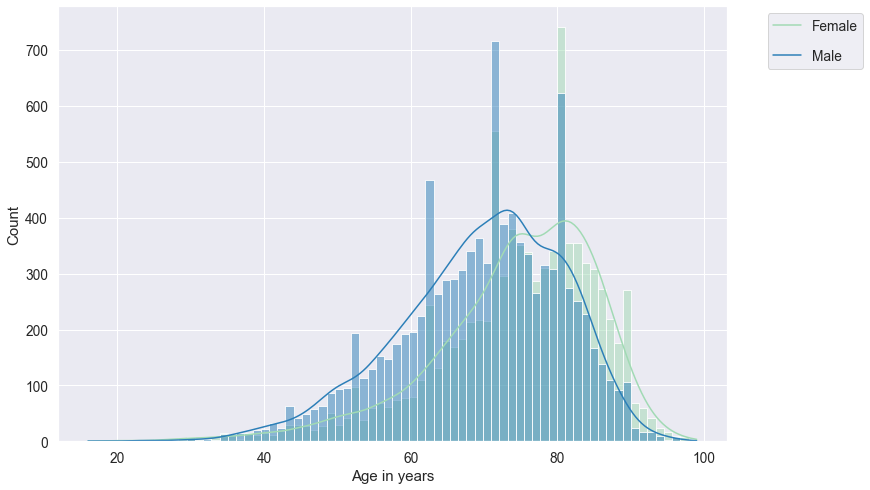

In [15]:
sns.histplot(x=df.AGE, kde=True, hue = df.SEX, palette = COLOR_SEX).set(xlabel='Age in years')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
           labels = ['Female', 'Male'], labelspacing=1.2)

#plt.savefig("images/age_count_sex.png", bbox_inches="tight")
plt.show()

### Health at randomization

There are only few parameters regarding health measurements in the dataset. These are systolic blood pressure, atrial fibrillation, deficits (caused by the stroke) and diagnosis of stroke type.

Blood pressure is usually measured in systolic blood pressure and diastolic blood pressure. If the systolic blood pressure is high and the diastolic blood pressure is low, the patient shows signs of isolated systolic hypertension. This condition can contribute to the risk of heart attakc and stroke ([source](https://www.healthline.com/health/heart-disease/high-systolic-blood-pressure#systolic-vs-diastolic)). 

  | [Systolic Blood Pressure](https://www.cdc.gov/bloodpressure/about.htm)
--- | ----:
Normal | Less than 120 mm Hg
At risk | 120 - 129 mm Hg
Hypertension | 130 mm Hg or higher 

The majority of all participants showed high values of systolic blood pressure, irregardless of sex.

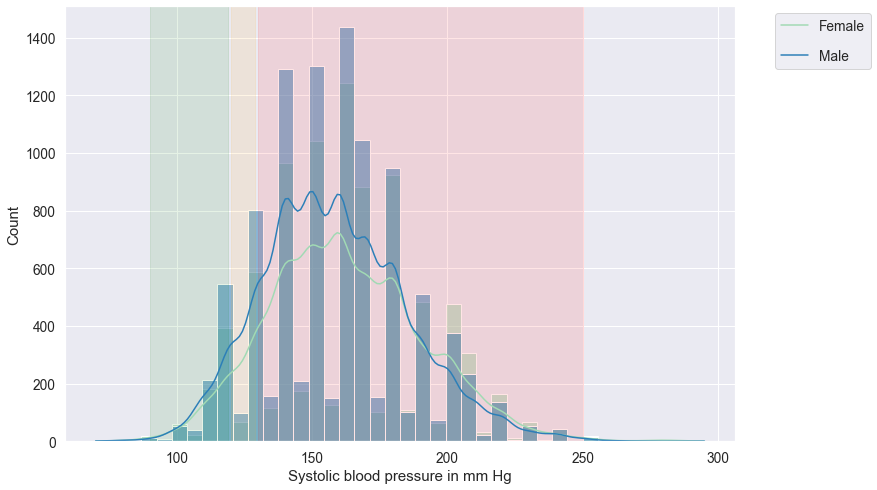

In [16]:
sns.histplot(x=df.RSBP, kde = True,  hue = df.SEX, bins = 40, palette = COLOR_SEX).set(xlabel='Systolic blood pressure in mm Hg')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
           labels = ['Female', 'Male'], labelspacing=1.2)

# highlight systolic blood pressurea
plt.axvspan(90, 119,alpha = 0.1, color = 'green')
plt.axvspan(120, 129,alpha = 0.1, color ='orange')
plt.axvspan(130, 250,alpha = 0.1, color ='red')

#plt.savefig("images/rsbp_count_sex.png", bbox_inches="tight")
plt.show()

### Atrial Fibrillation

Atrial fibrillation is an abnormal heart rhythm (arrhythmia) characterized by the rapid and irregular beating of the atrial chambers of the heart. The older the participancts were the more likely they wer eto show signs of atrial fibrillation

In [25]:
#df_af = pd.DataFrame()
group_af = df.groupby(['AGE_bin'])
group_af.RATRIAL.value_counts()

AGE_bin  RATRIAL
16 - 63  N          3597
         Y           187
64 - 70  N          2890
         Y           397
71 - 76  N          3300
         Y           641
77 - 82  N          2745
         Y           859
83 - 99  N          2198
         Y          1007
Name: RATRIAL, dtype: int64

In [26]:
print(f"--- 16 - 63 years ---")
print(f'{round((group_af.RATRIAL.value_counts()[1]/ (group_af.RATRIAL.value_counts()[0] + group_af.RATRIAL.value_counts()[1]) * 100),1)} % of participants showed signs of atrial fibrillation')
print()
print(f"--- 64 - 70 years ---")
print(f'{round((group_af.RATRIAL.value_counts()[3]/ (group_af.RATRIAL.value_counts()[2] + group_af.RATRIAL.value_counts()[3]) * 100), 1)} % of participants showed signs of atrial fibrillation')
print()
print(f"--- 71 - 76 years ---")
print(f'{round((group_af.RATRIAL.value_counts()[5]/ (group_af.RATRIAL.value_counts()[4] + group_af.RATRIAL.value_counts()[5]) * 100), 1)} % of participants showed signs of atrial fibrillation')
print()
print(f"--- 77 - 82 years ---")
print(f'{round((group_af.RATRIAL.value_counts()[7]/ (group_af.RATRIAL.value_counts()[6] + group_af.RATRIAL.value_counts()[7]) * 100), 1)} % of participants showed signs of atrial fibrillation')
print()
print(f"--- 83 - 99 years ---")
print(f'{round((group_af.RATRIAL.value_counts()[9]/ (group_af.RATRIAL.value_counts()[8] + group_af.RATRIAL.value_counts()[9]) * 100), 1)} % of participants showed signs of atrial fibrillation')

--- 16 - 63 years ---
4.9 % of participants showed signs of atrial fibrillation

--- 64 - 70 years ---
12.1 % of participants showed signs of atrial fibrillation

--- 71 - 76 years ---
16.3 % of participants showed signs of atrial fibrillation

--- 77 - 82 years ---
23.8 % of participants showed signs of atrial fibrillation

--- 83 - 99 years ---
31.4 % of participants showed signs of atrial fibrillation


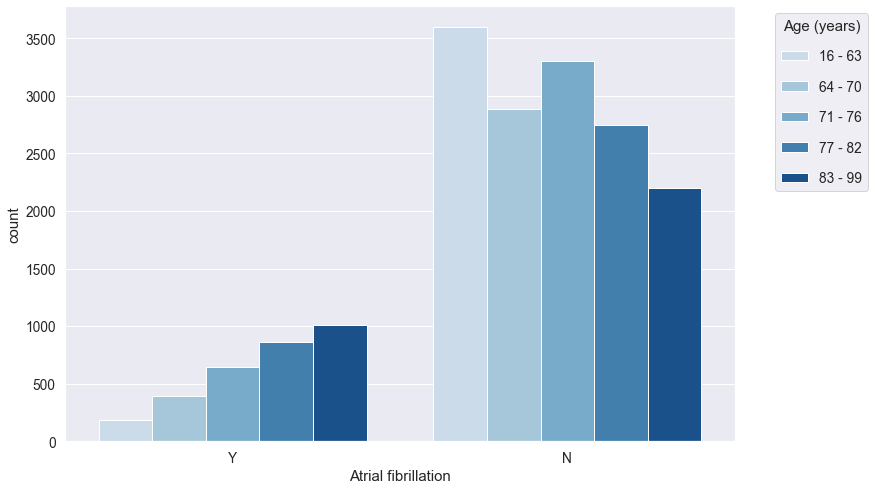

In [30]:
ax = sns.countplot(x = df.RATRIAL, hue = df.AGE_bin.sort_values(), palette = COLOR_AGE)
ax.set(xlabel="Atrial fibrillation")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Age (years)',
           labels = ['16 - 63', '64 - 70', '71 - 76', '77 - 82', '83 - 99'], labelspacing=1.2)


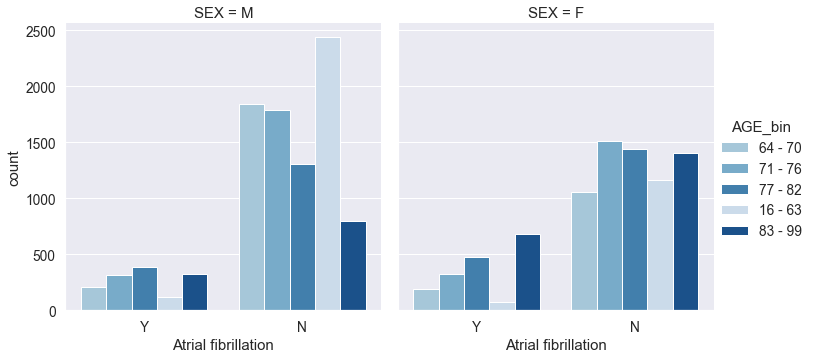

In [49]:
#plot_order = df.AGE_bin.sort_values().unique()

#ax = sns.catplot(x = 'RATRIAL', hue = 'AGE_bin', col= 'SEX', data = df, kind = 'count', palette = COLOR_AGE)
#ax.set(xlabel="Atrial fibrillation")

#patches = [pat.Patch(color=v, label=k) for k,v in COLOR_AGE.items()]
#plt.legend(handles=patches)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Age (years)',
#           labels = ['16 - 63', '64 - 70', '71 - 76', '77 - 82', '83 - 99'], labelspacing=1.2)


<ipython-input-72-2009911a2dd0>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


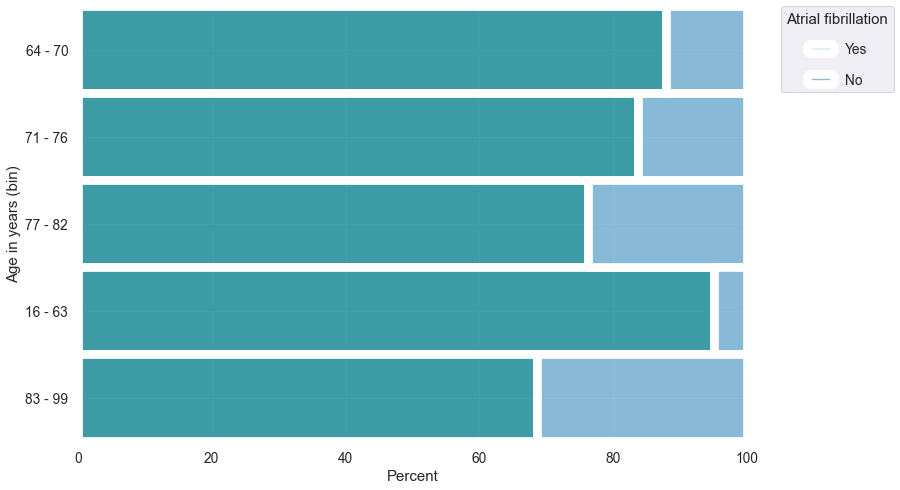

In [72]:
ax = sns.histplot(y = 'AGE_bin',
                 hue= 'RATRIAL',
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_RATRIAL, data = df,
                 )

ax.set(xlabel="Percent")
ax.set(ylabel="Age in years (bin)")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,
           labels = ['Yes', 'No'], labelspacing=1.2, title = 'Atrial fibrillation')

#plt.savefig("images/age_perc_ratrial.png", bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='RATRIAL', ylabel='count'>

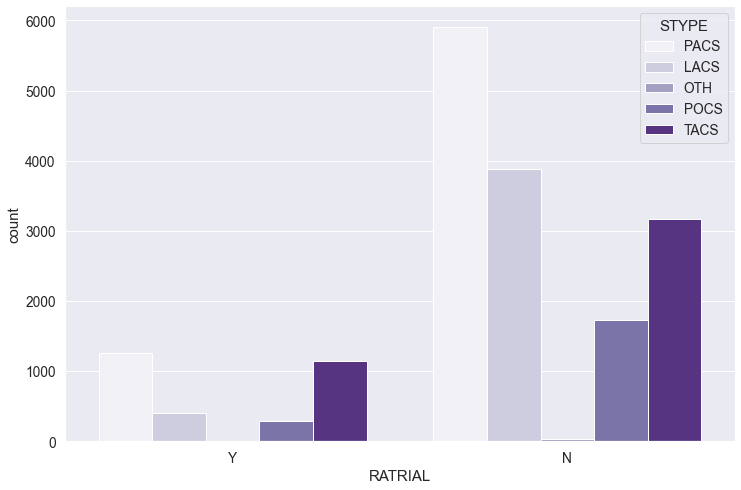

In [73]:
sns.countplot(x = df.RATRIAL, hue = df.STYPE, palette = COLOR_STYPE)

### Deficits

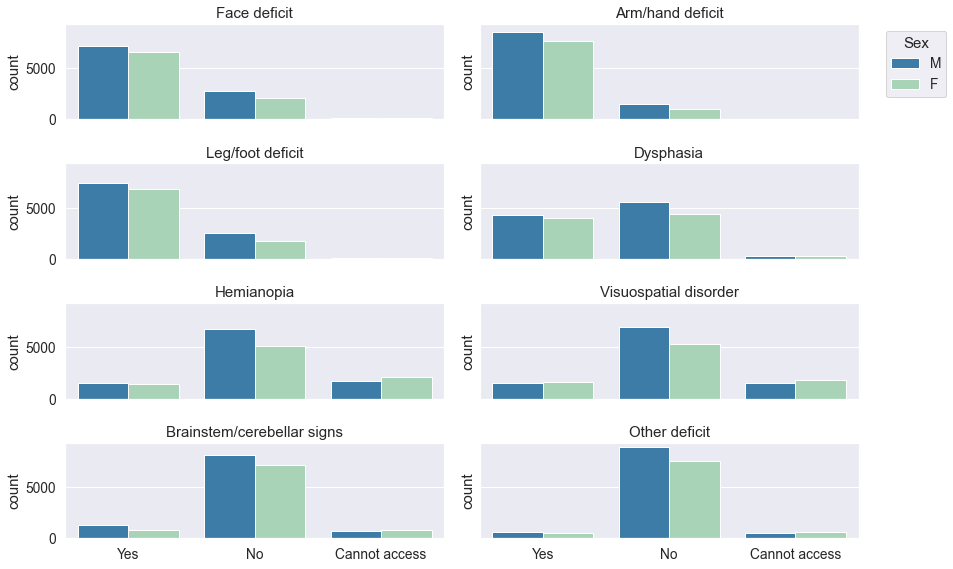

In [58]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(12, 8), sharex=True, sharey=True)
fig.tight_layout(h_pad=2)

sns.countplot(x=df.RDEF1.sort_values(ascending=False), hue = df.SEX, ax = ax1, palette = COLOR_SEX).set_title('Face deficit')
ax1.get_legend().remove()
ax1.set(xlabel=None)
sns.countplot(x=df.RDEF2.sort_values(ascending=False), hue = df.SEX, ax = ax2, palette = COLOR_SEX).set_title('Arm/hand deficit')
ax2.legend(bbox_to_anchor= (1.25, 1), title = 'Sex')
ax2.set(xlabel=None)
sns.countplot(x=df.RDEF3.sort_values(ascending=False), hue = df.SEX, ax = ax3, palette = COLOR_SEX).set_title('Leg/foot deficit')
ax3.get_legend().remove()
ax3.set(xlabel=None)
sns.countplot(x=df.RDEF4.sort_values(ascending=False), hue = df.SEX, ax = ax4, palette = COLOR_SEX).set_title('Dysphasia')
ax4.get_legend().remove()
ax4.set(xlabel=None)
sns.countplot(x=df.RDEF5.sort_values(ascending=False), hue = df.SEX, ax = ax5, palette = COLOR_SEX).set_title('Hemianopia')
ax5.get_legend().remove()
ax5.set(xlabel=None)
sns.countplot(x=df.RDEF6.sort_values(ascending=False), hue = df.SEX, ax = ax6, palette = COLOR_SEX).set_title('Visuospatial disorder')
ax6.get_legend().remove()
ax6.set(xlabel=None)
sns.countplot(x=df.RDEF7.sort_values(ascending=False), hue = df.SEX, ax = ax7, palette = COLOR_SEX).set_title('Brainstem/cerebellar signs')
ax7.get_legend().remove()
ax7.set(xlabel=None)
ax7.set_xticklabels(['Yes', 'No', 'Cannot access'])
sns.countplot(x=df.RDEF8.sort_values(ascending=False), hue = df.SEX, ax = ax8, palette = COLOR_SEX).set_title('Other deficit')
ax8.get_legend().remove()
ax8.set(xlabel=None)
ax8.set_xticklabels(['Yes', 'No', 'Cannot access'])


#handles, labels = ax.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center')

#plt.savefig("images/rdef_count_stype.png", bbox_inches="tight")

plt.show()

The majority of the participants showed face, arm/hand and leg/foot deficits. A little less than half of the participants had dysphasia. Other severe impairments did not occur as often (hemianopia, visuaspatial disorder, brainstem/cerebellar signs).

Deficit | Description
:--- | :----
Dysphasia | Partial or complete impairment of the ability to communicate resulting from brain injury
Hemianopia | Defective vision or blindness in half of the visual field; usually applied to bilateral defects caused by a single lesion
Visuospatial disorder | Distortion of the visual perception of spatial relationships
Brainstem/cerebellar signs | A cerebellar stroke is one of the less common types of strokes. It occurs when a blood vessel is blocked or bleeding, causing complete interruption to a portion of the cerebellum.

### Diagnosis

The abovementioned deficits are used to classify and eventually diagnose the particular strokes. We have information on ischaemic strokes only, which also make up the majority of diagnoses.

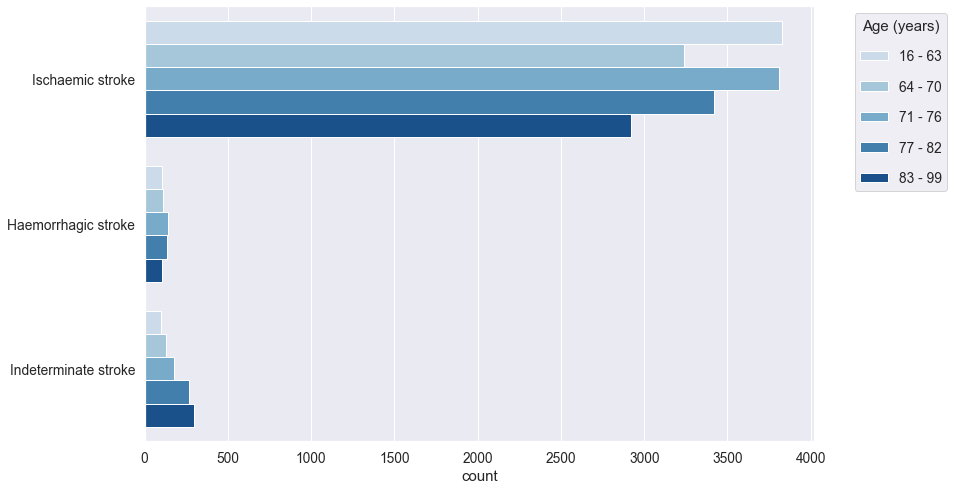

In [65]:
ax = sns.countplot(y = df.DIAGSTR, hue= df.AGE_bin.sort_values(), palette = COLOR_AGE)
ax.set(ylabel="")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Age (years)',
           labels = ['16 - 63', '64 - 70', '71 - 76', '77 - 82', '83 - 99'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

In [80]:
# Calculate percentage of patients for each kind of stroke

istr_count = df.DIAG.value_counts()[0] # total number of patients with an ischaemic stroke
ind_count = df.DIAG.value_counts()[1] # total number of patients with an indeterminate stroke
hstr_count = df.DIAG.value_counts()[2] # total number of patients with a haemorraghic stroke

print(f'{round((istr_count/ (istr_count + ind_count + hstr_count) * 100),1)} % patients with an ischaemic stroke')
print(f'{round((ind_count/ (istr_count + ind_count + hstr_count) * 100),1)} % patients with an indeterminate stroke')
print(f'{round((hstr_count/ (istr_count + ind_count + hstr_count) * 100),1)} % patients with a haemorraghic stroke')

91.7 % patients with an ischaemic stroke
5.2 % percentage of patients with an indeterminate stroke
3.2 % percentage of patients with a haemorraghic stroke


In [75]:
df.DIAGSTR.value_counts()

Ischaemic stroke        17215
Indeterminate stroke      969
Haemorrhagic stroke       595
Name: DIAGSTR, dtype: int64


### Types of ischaemic strokes

#### Total anterior circulation stroke syndrome [(TACS)](https://en.wikipedia.org/wiki/Total_anterior_circulation_infarct)
TACS refers to the symptoms of a patient who clinically appears to have suffered from a total anterior circulation infarct, but who has not yet had any diagnostic imaging (e.g. CT Scan) to confirm the diagnosis.

It is diagnosed when it causes all 3 of the following symptoms:

+ Higher dysfunction
    + Dysphasia (Dysphasia is a partial or complete impairment of the ability to communicate resulting from brain injury.)
    + Visuospatial disturbances (Pertaining to visual perception of spatial relationships.)
    + Decreased level of consciousness   
+ Homonymous hemianopia (Defective vision or blindness in half of the visual field; usually applied to bilateral defects caused by a single lesion.)
+ Motor and sensory defects (≥2/3 of face, arm, leg)


#### Partial anterior circulation stroke syndrome [(PACS)](https://en.wikipedia.org/wiki/Partial_anterior_circulation_infarct) 
PACS refers to the symptoms of a patient who clinically appears to have suffered from a partial anterior circulation infarct, but who has not yet had any diagnostic imaging (e.g. CT Scan) to confirm the diagnosis.

It is diagnosed by any one of the following

+ 2 out of 3 features of
    + Higher dysfunction
        + Dysphasia
        + Visuospatial disturbances
    + Homonymous hemianopia
    + Motor and Sensory Defects (>2/3 of face, arm, leg)
+ Higher dysfunction alone
+ Partial motor or sensory defect
If all of the above symptoms are present, a Total Anterior Circulation Infarct is more likely.

#### Posterior circulation stroke syndrome [(POCS)](https://en.wikipedia.org/wiki/Posterior_circulation_infarct) 
POCS refers to the symptoms of a patient who clinically appears to have had a posterior circulation infarct, but who has not yet had any diagnostic imaging (e.g. CT Scan) to confirm the diagnosis.

It can cause the following symptoms:

+ Cranial nerve palsy AND contralateral motor/sensory defect
+ Bilateral motor or sensory defect
+ Eye movement problems (e.g.nystagmus)
+ Cerebellar dysfunction
+ Isolated homonymous hemianopia
+ Vertigo

It has also been associated with deafness.

#### Lacunar stroke or lacunar cerebral Syndrome [(LACS)](https://en.wikipedia.org/wiki/Lacunar_stroke)
Lacunar stroke is the most common type of ischaemic stroke, resulting from the occlusion of small penetrating arteries that provide blood to the brain's deep structures. Patients who present with symptoms of a lacunar stroke, but who have not yet had diagnostic imaging performed, may be described as suffering from lacunar stroke syndrome (LACS).

Symptoms:
+ Pure motor stroke/hemiparesis (most common lacunar syndrome: 33–50%)
+ Ataxic hemiparesis (second most frequent lacunar syndrome)
+ Dysarthria/clumsy hand (sometimes considered a variant of ataxic hemiparesis, but usually still is classified as a separate lacunar syndrome)
+ Pure sensory stroke
+ Mixed sensorimotor stroke

Hemiparesis is the weakness of one entire side of the body. Hemiplegia is, in its most severe form, complete paralysis of half of the body. In this study those symptoms were reported as face deficit, hand/arm deficit and foot/leg deficit.

True cortical signs (aphasia, visuospatial neglect, gaze deviation, and visual field defects) are always absent in lacunar strokes.


In [76]:
df.STYPE.value_counts()

PACS    7541
TACS    4534
LACS    4505
POCS    2147
OTH       52
Name: STYPE, dtype: int64

PACS was by far the most diagnosed stroke type, followed by TACS and LACS. Fewer patients were diagnosed with POCS. A very small number of patient were not diagnosed with either type of stroke ("OTH"). The relation between these kind of strokes was present in all age groups.

In [78]:
group_age = df.groupby('AGE_bin')
group_age.STYPE.value_counts()

AGE_bin  STYPE
16 - 63  PACS     1529
         LACS     1256
         TACS      661
         POCS      570
         OTH        18
64 - 70  PACS     1352
         LACS      968
         TACS      733
         POCS      419
         OTH         6
71 - 76  PACS     1695
         TACS     1009
         LACS      955
         POCS      455
         OTH        12
77 - 82  PACS     1553
         TACS     1063
         LACS      777
         POCS      417
         OTH         9
83 - 99  PACS     1412
         TACS     1068
         LACS      549
         POCS      286
         OTH         7
Name: STYPE, dtype: int64

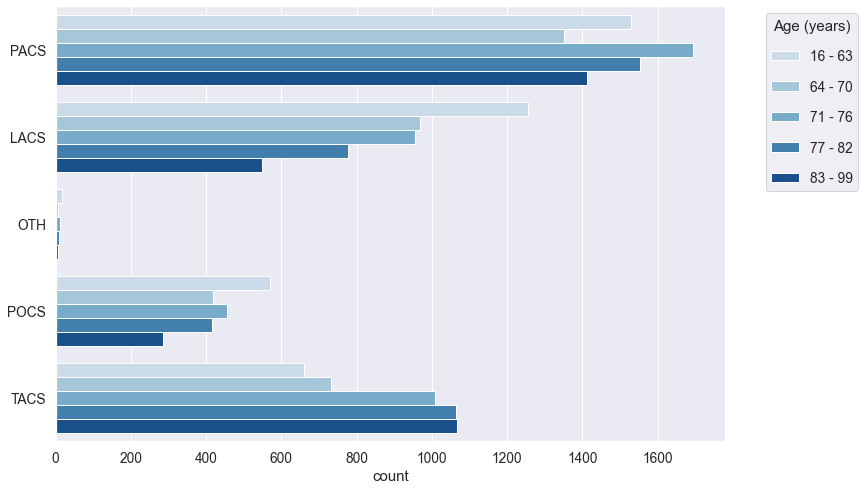

In [74]:
ax = sns.countplot(y = df.STYPE, hue= df.AGE_bin.sort_values(), palette = COLOR_AGE)
ax.set(ylabel="")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Age (years)',
           labels = ['16 - 63', '64 - 70', '71 - 76', '77 - 82', '83 - 99'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()


In comparison to men, fewer women were diagnosed with LACS and more with PACS.

In [81]:
# Drop patients with STPYE == 'OTH' (only few patients with this diagnosis)
df_type = df[df['STYPE'] != 'OTH']

<ipython-input-82-236603bd9480>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-input-82-236603bd9480>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Male', 'Female'])


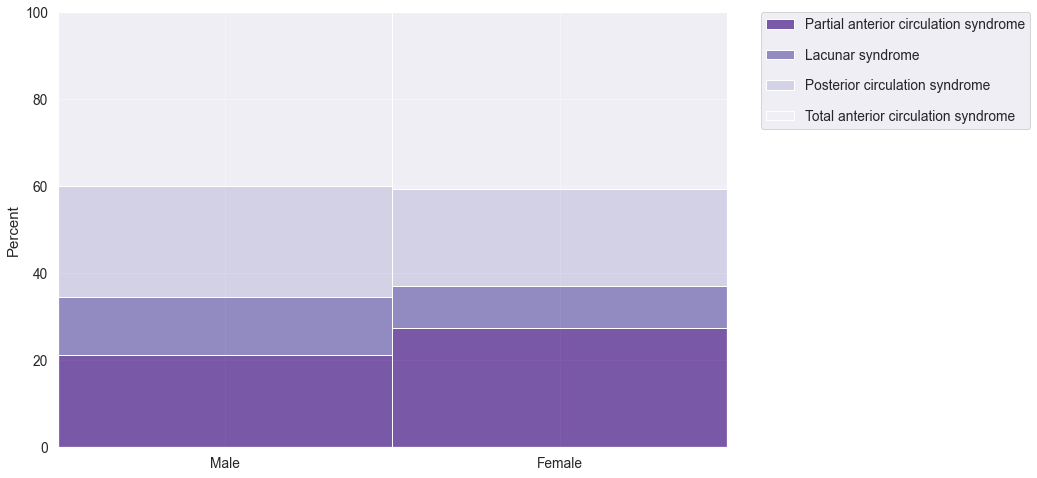

In [82]:
ax = sns.histplot(x = df_type.SEX.sort_values(),
                 hue= df_type.STYPE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_STYPE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
          labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

In [44]:
group_f_ddead = df.query('SEX == "F"').groupby('DDEAD')
group_f_ddead['STYPE'].value_counts()

DDEAD  STYPE
N      PACS     2912
       LACS     1735
       TACS     1712
       POCS      668
Y      TACS      456
       PACS      286
       POCS       83
       LACS       46
Name: STYPE, dtype: int64

In [45]:
group_m_ddead = df.query('SEX == "M"').groupby('DDEAD')
group_m_ddead['STYPE'].value_counts()

DDEAD  STYPE
N      PACS     3422
       LACS     2339
       TACS     1545
       POCS     1119
Y      TACS      384
       PACS      270
       POCS      107
       LACS       51
Name: STYPE, dtype: int64

<AxesSubplot:xlabel='ONDRUG', ylabel='AGE'>

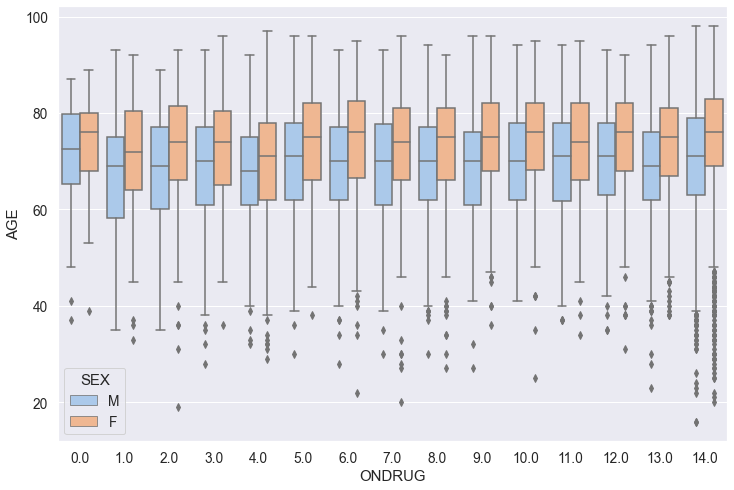

In [47]:
sns.boxplot(x = df.ONDRUG,y = df.AGE, hue = df.SEX)

<AxesSubplot:xlabel='count', ylabel='DMEDS'>

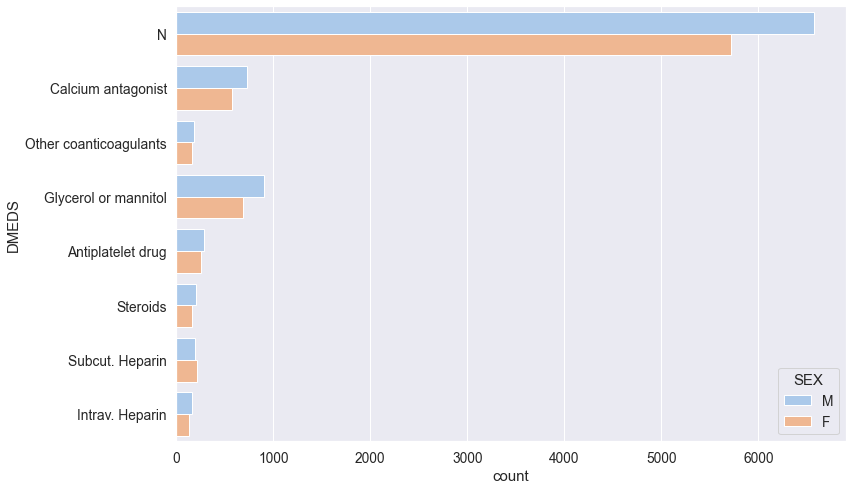

In [48]:
# combi of DSCH, DIVH, DAP, DOAC, DGORM, DSTER and DCAA
sns.countplot(y = df.DMEDS, hue = df.SEX)

<AxesSubplot:xlabel='count', ylabel='DMEDS'>

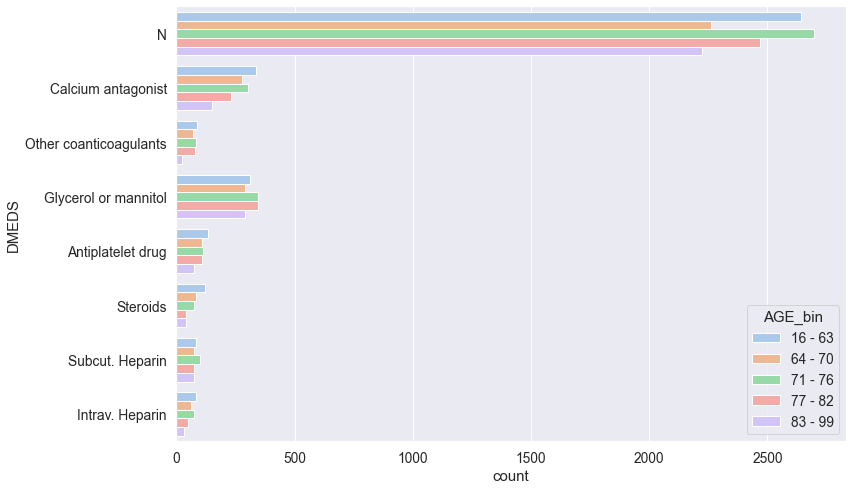

In [49]:
sns.countplot(y = df.DMEDS, hue = df.AGE_bin.sort_values())

In [50]:
#some kind of surgery?
group_sur = df.groupby(by=['DHAEMD', 'DCAREND', 'DTHROMB'])
group_sur['STYPE'].value_counts()

DHAEMD  DCAREND  DTHROMB  STYPE
N       N        N        PACS     6378
                          LACS     3853
                          TACS     3801
                          POCS     1807
                 U        LACS        1
                 Y        TACS        6
                          LACS        3
                          PACS        2
                          POCS        1
        U        N        PACS        3
        Y        N        PACS       16
                          LACS       14
                          POCS        5
                          TACS        4
U       N        N        PACS        1
        U        N        PACS        4
                          TACS        3
                          LACS        1
                 U        PACS        2
                          LACS        1
                          POCS        1
                          TACS        1
Y       N        N        PACS      213
                          LACS      129
        

<AxesSubplot:xlabel='count', ylabel='RDIAG14'>

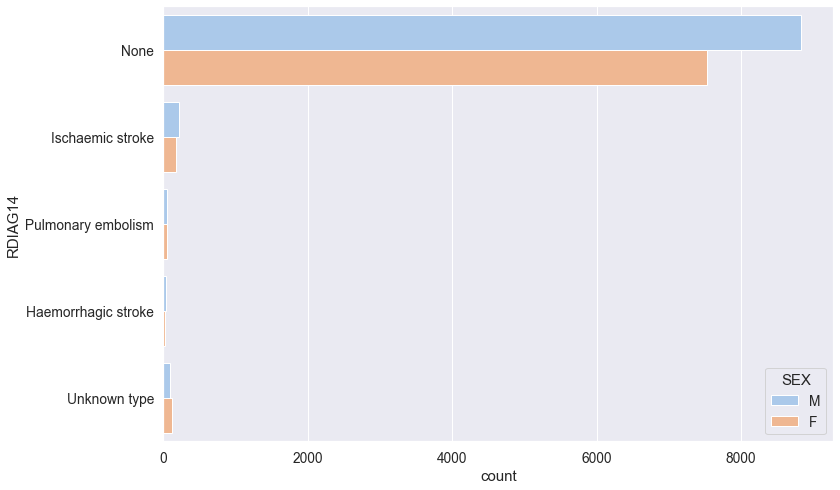

In [51]:
# Another occurrence of a stroke within 14 days of the first one?
# combined RSISC, DRSH, DRSUNK, DPE
sns.countplot(y = df.RDIAG14, hue = df.SEX)

In [52]:
#some kind of surgery?
group_sur = df.groupby(by=['RDIAG14','STYPE'])
group_sur['SEX'].value_counts()

RDIAG14              STYPE  SEX
Haemorrhagic stroke  LACS   M         4
                            F         2
                     PACS   M        17
                            F         9
                     POCS   F         6
                            M         1
                     TACS   M        19
                            F        11
Ischaemic stroke     LACS   M        49
                            F        33
                     PACS   M        91
                            F        67
                     POCS   M        31
                            F        28
                     TACS   F        49
                            M        45
None                 LACS   M      2317
                            F      1722
                     PACS   M      3531
                            F      3063
                     POCS   M      1178
                            F       704
                     TACS   F      2038
                            M      1808
Pulmonar

<AxesSubplot:xlabel='count', ylabel='RDIAG14'>

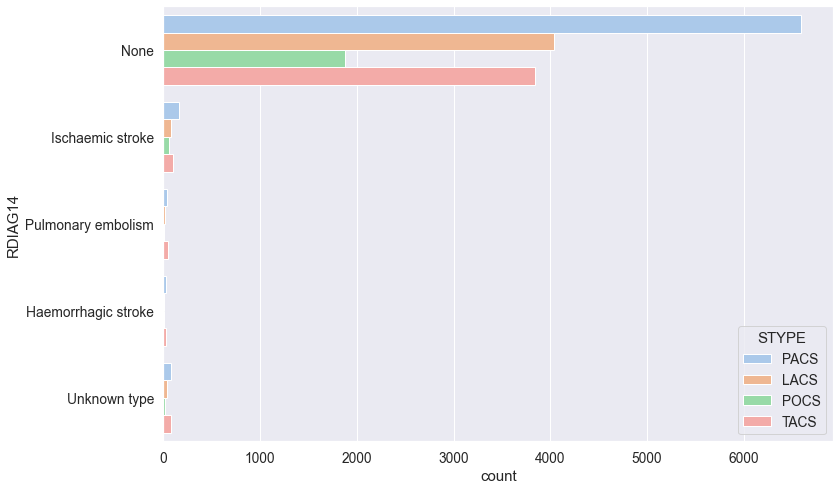

In [53]:
sns.countplot(y = df.RDIAG14, hue = df.STYPE)

<AxesSubplot:xlabel='count', ylabel='RDISCH14'>

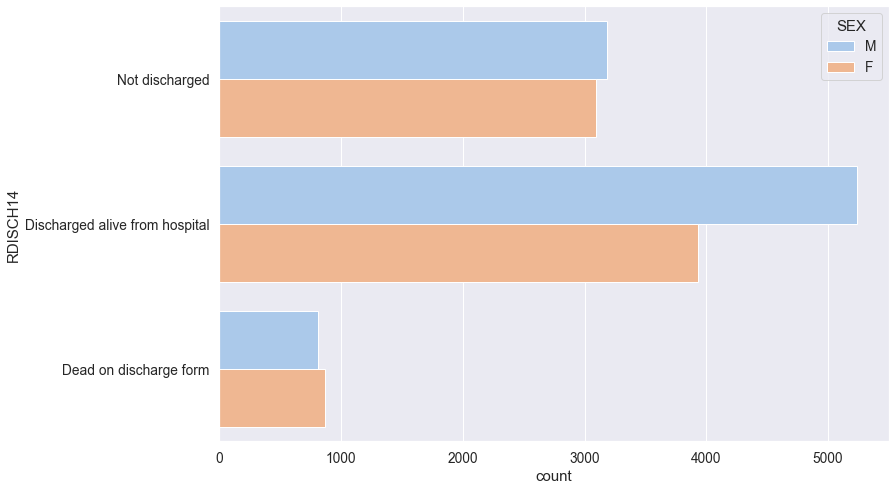

In [54]:
#combined DALIVE (Y and N) and DDEAD (Y)
sns.countplot(y = df.RDISCH14, hue = df.SEX)

<AxesSubplot:xlabel='count', ylabel='RDISCH14'>

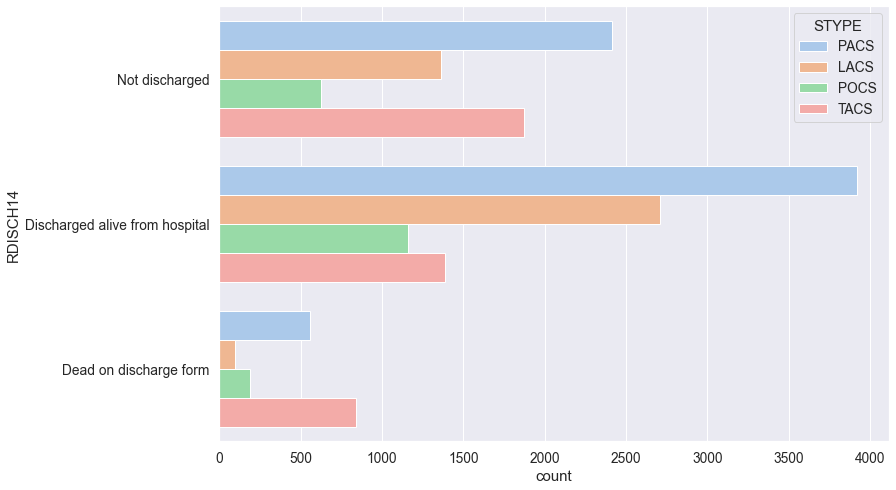

In [55]:
sns.countplot(y = df.RDISCH14, hue = df.STYPE)

<ipython-input-56-8609da92020e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


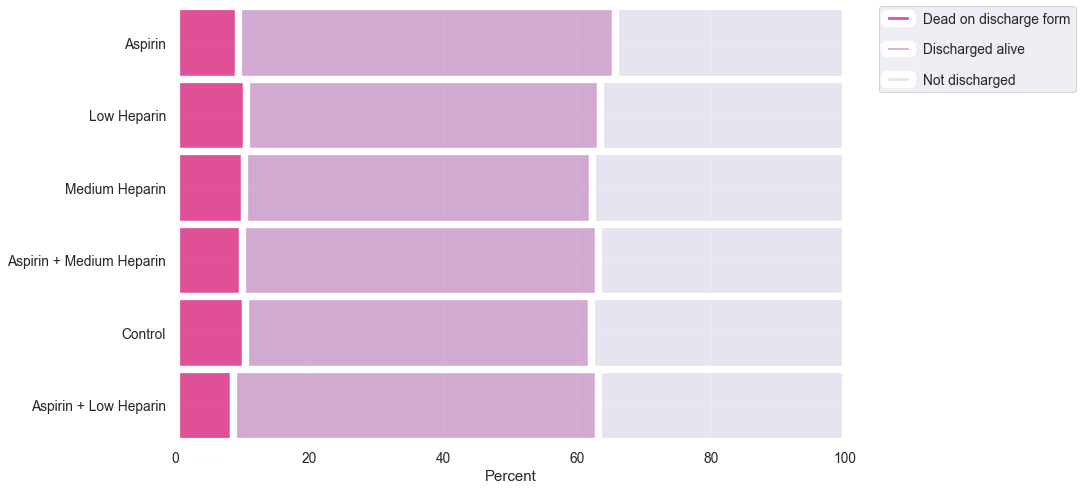

In [56]:
ax = sns.histplot(y = df.TREAT14,
                 hue= df.RDISCH14,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_RDISCH14
                 )
ax.set(ylabel="")
ax.set(xlabel="Percent")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)
#ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
        labels = ['Dead on discharge form', 'Discharged alive', 'Not discharged'], labelspacing=1.2)

#plt.savefig("images/treat_perc_disch14.png", bbox_inches="tight")
plt.show()

<ipython-input-57-b45f08cf84af>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


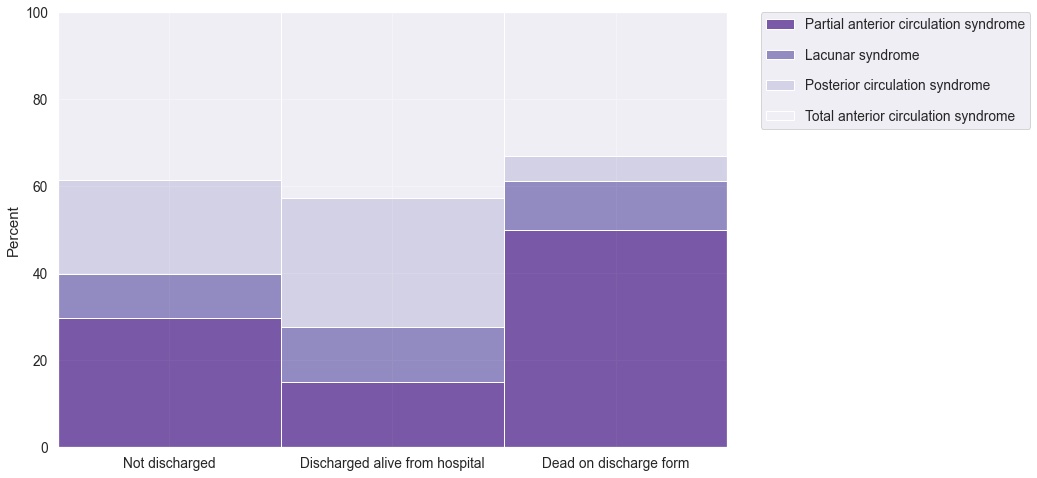

In [57]:
ax = sns.histplot(x = df.RDISCH14,
                 hue= df.STYPE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_STYPE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

In [58]:
df_male = df.loc[df['SEX'] == 'M']
df_female = df.loc[df['SEX'] == 'F']

<ipython-input-59-e0db7f4e7fb7>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ylabels)


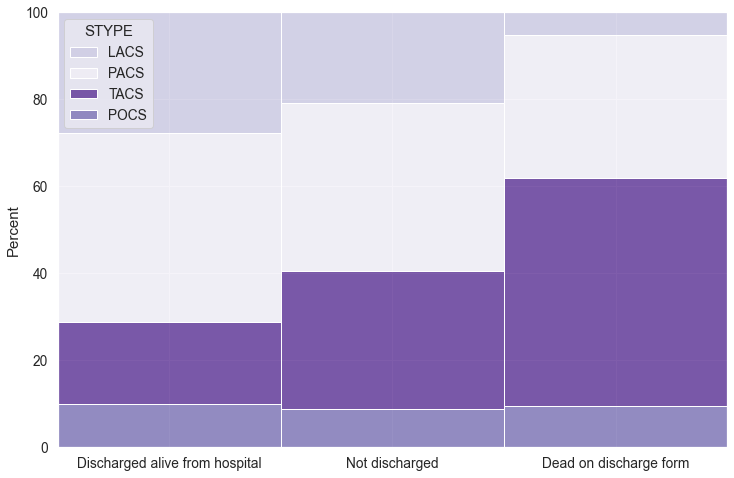

In [59]:
#fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)

ax1 = sns.histplot(x = df_female.RDISCH14.sort_values(),
                 hue= df_female.STYPE.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_STYPE
                )
ax1.set(xlabel="")
ax1.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax1.get_yticks()*100]
ax1.set_yticklabels(ylabels)


#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

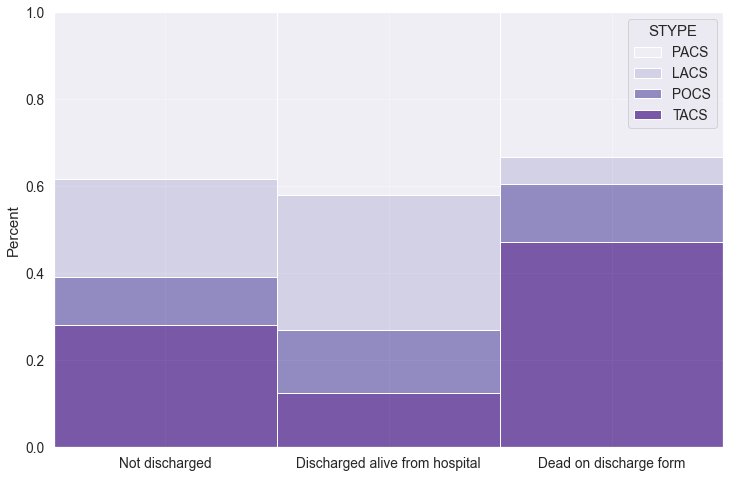

In [60]:

ax2 = sns.histplot(x = df_male.RDISCH14,
                 hue= df_male.STYPE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_STYPE
                 )
ax2.set(xlabel="")
ax2.set(ylabel="Percent")

#ax.set_xticklabels(['Male', 'Female'])

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

In [61]:
print(df.RDISCH14.value_counts())
print(df.AGE_bin.value_counts())
df.SEX.value_counts()

Discharged alive from hospital    9173
Not discharged                    6279
Dead on discharge form            1683
Name: RDISCH14, dtype: int64
16 - 63    3801
71 - 76    3793
77 - 82    3403
64 - 70    3229
83 - 99    2909
Name: AGE_bin, dtype: int64


M    9237
F    7898
Name: SEX, dtype: int64

In [62]:
sns.catplot(x=df.RDISCH14, col=df.AGE_bin, hue=df.SEX, kind='count')

TypeError: 'NoneType' object is not subscriptable

<AxesSubplot:xlabel='count', ylabel='RDISCH14'>

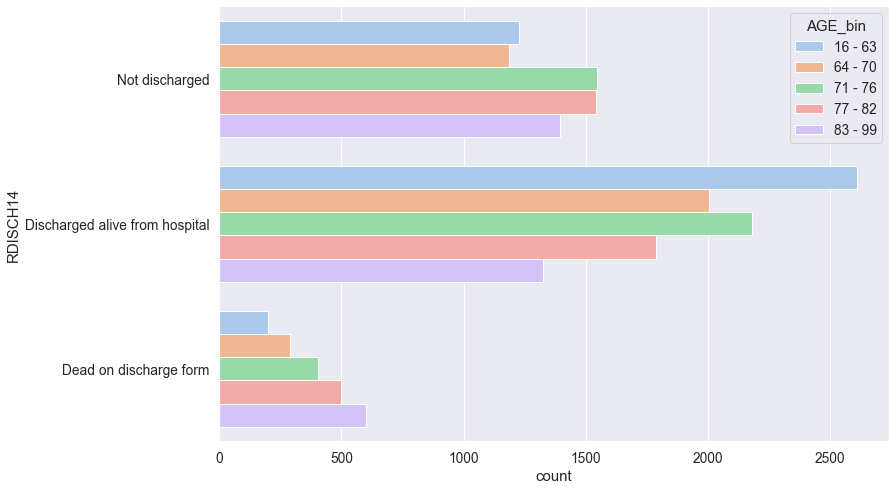

In [125]:
#combined DALIVE (Y and N) and DDEAD (Y)
sns.countplot(y = df.RDISCH14, hue = df.AGE_bin.sort_values())

<ipython-input-54-959d39dfbb8c>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


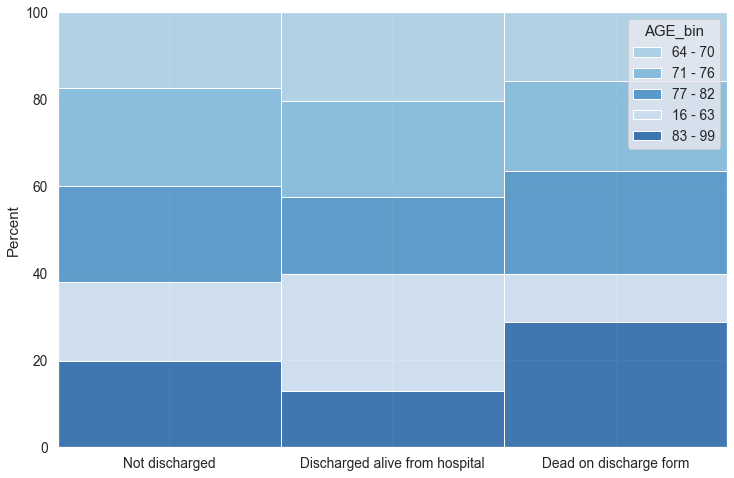

In [54]:
ax = sns.histplot(x = df.RDISCH14,
                 hue= df.AGE_bin.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_AGE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
#           labels = ['16 - 63', '64 - 70', '71 - 76', '77 - 82', '83 - 99'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

In [55]:
#df['DPLACE'].replace({'A': 'Home', 'B': 'Relatives home', 'C': 'Residential care', 'D': 'Nursing home', 'E': 'Other hospital departments', 'U': 'Unknown'}, inplace=True)

<AxesSubplot:xlabel='count', ylabel='DPLACE'>

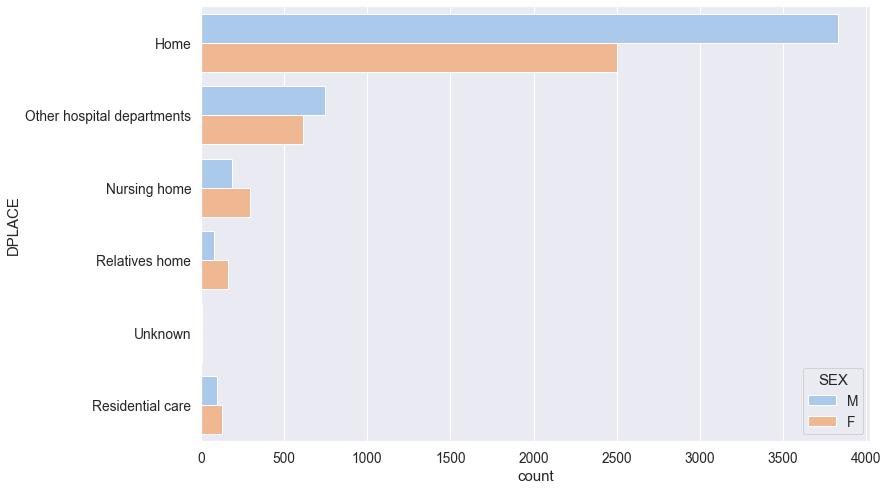

In [56]:
sns.countplot(y = df.DPLACE, hue = df.SEX)

In [57]:
ax = sns.histplot(x = df.DPLACE,
                 hue= df.SEX,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_SEX
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()


TypeError: unsupported operand type(s) for -: 'str' and 'float'

<AxesSubplot:xlabel='count', ylabel='DPLACE'>

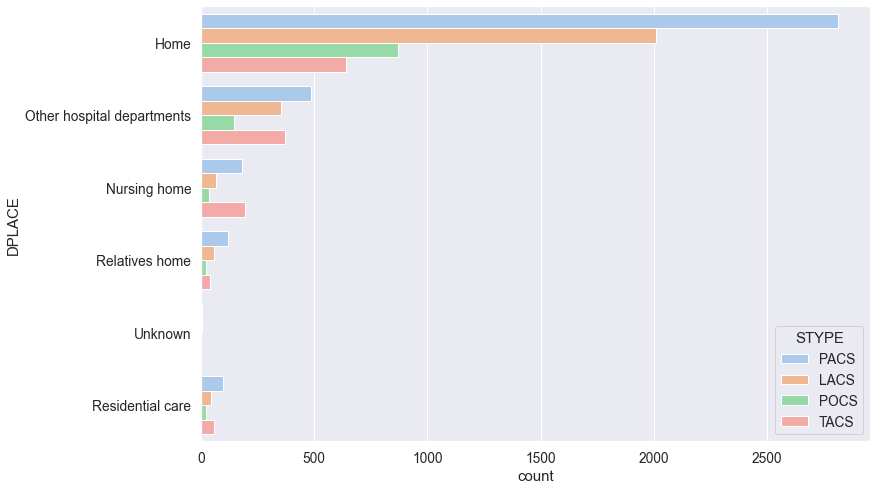

In [58]:
sns.countplot(y = df.DPLACE, hue = df.STYPE)

In [59]:
ax = sns.histplot(x = df.DPLACE,
                 hue= df.STYPE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_STYPE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

<AxesSubplot:xlabel='count', ylabel='DPLACE'>

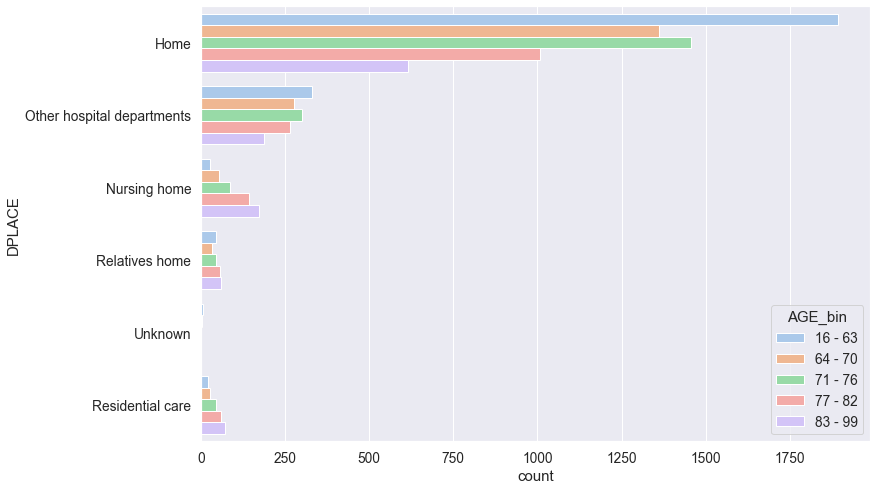

In [60]:
sns.countplot(y = df.DPLACE, hue = df.AGE_bin.sort_values())

In [61]:
ax = sns.histplot(x = df.DPLACE,
                 hue= df.AGE_bin,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STYPE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [58]:
#df['DDEADC'].replace({1: 'Initial Stroke', 2: 'Recurrent stroke (ischaemic or unknown)', 3: 'Recurrent stroke (haemorrhagic)', 
#4: 'Pneumonia', 5: 'Coronary heart disease', 6: 'Pulmonary embolism', 7: 'Other vascular or unknown', 8: 'Non-vascular', 0: 'Unknown'}, inplace=True)

<AxesSubplot:xlabel='FDEAD', ylabel='count'>

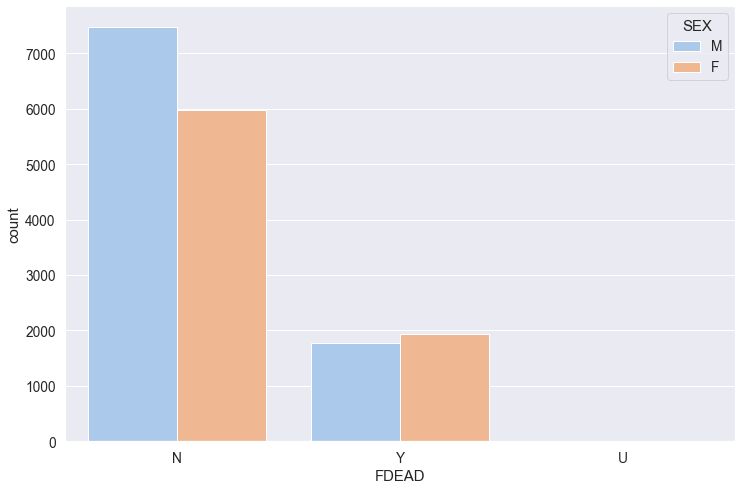

In [59]:
sns.countplot(x = df.FDEAD, hue = df.SEX)

<AxesSubplot:xlabel='FDEAD', ylabel='count'>

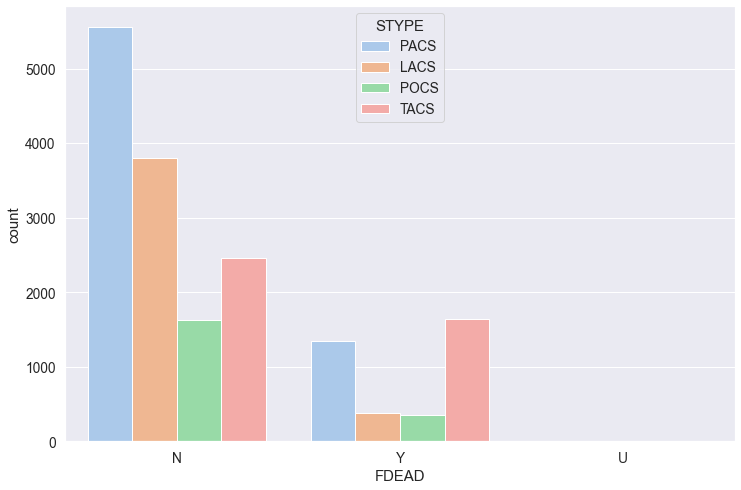

In [60]:
sns.countplot(x = df.FDEAD, hue = df.STYPE)

<ipython-input-174-023fa7af1183>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


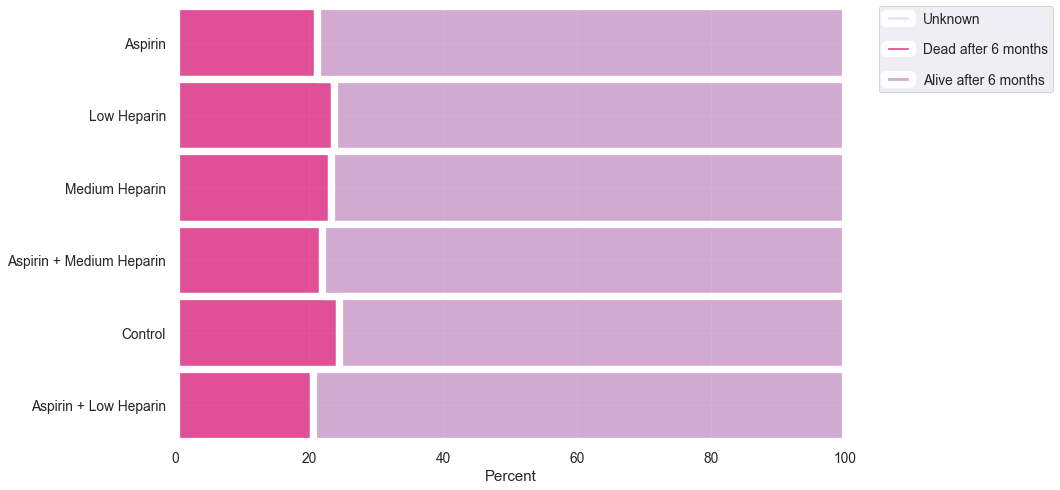

In [174]:
ax = sns.histplot(y = df.TREAT14,
                 hue= df.FDEAD,
                 stat = 'probability',
                 multiple="fill",
                 palette = ['#c994c7', '#dd1c77', '#e7e1ef', ]
                 )
ax.set(ylabel="")
ax.set(xlabel="Percent")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)
#ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
        labels = ['Unknown',  'Dead after 6 months', 'Alive after 6 months'], labelspacing=1.2)

#plt.savefig("images/treat_perc_fdead.png", bbox_inches="tight")
plt.show()

<ipython-input-167-8abbddcae8cd>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


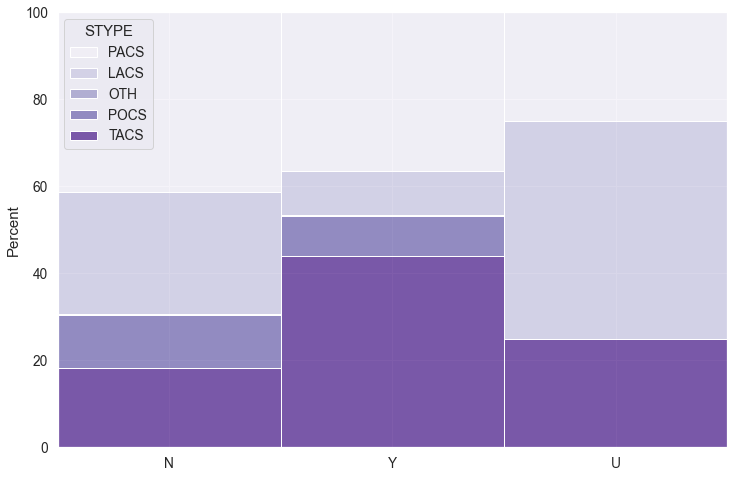

In [167]:
ax = sns.histplot(x = df.FDEAD,
                 hue= df.STYPE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_STYPE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

In [62]:
#df['FDEADC'].replace({1: 'Initial Stroke', 2: 'Recurrent stroke (ischaemic or unknown)', 3: 'Recurrent stroke (haemorrhagic)', 
#4: 'Pneumonia', 5: 'Coronary heart disease', 6: 'Pulmonary embolism', 7: 'Other vascular or unknown', 8: 'Non-vascular', 0: 'Unknown'}, inplace=True)

<AxesSubplot:xlabel='count', ylabel='FDEADC'>

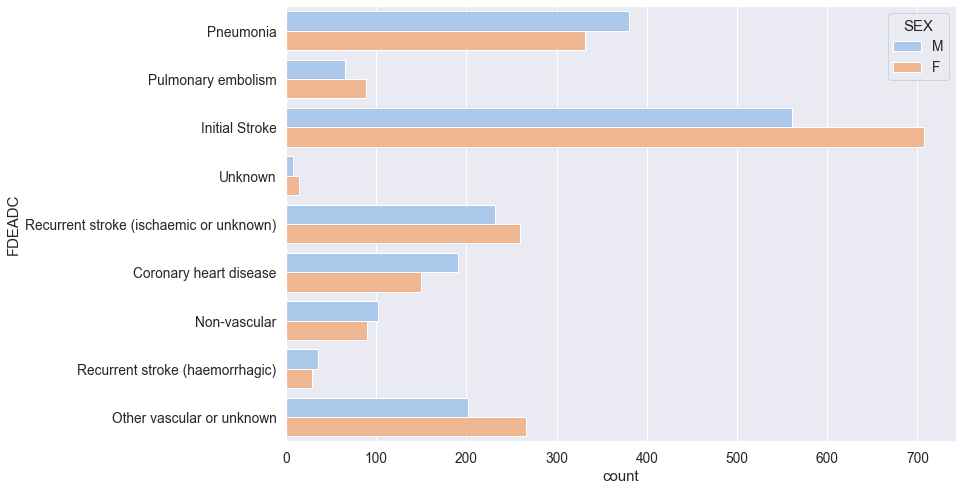

In [63]:
sns.countplot(y = df.FDEADC, hue = df.SEX)

<ipython-input-64-8dc02a88e717>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


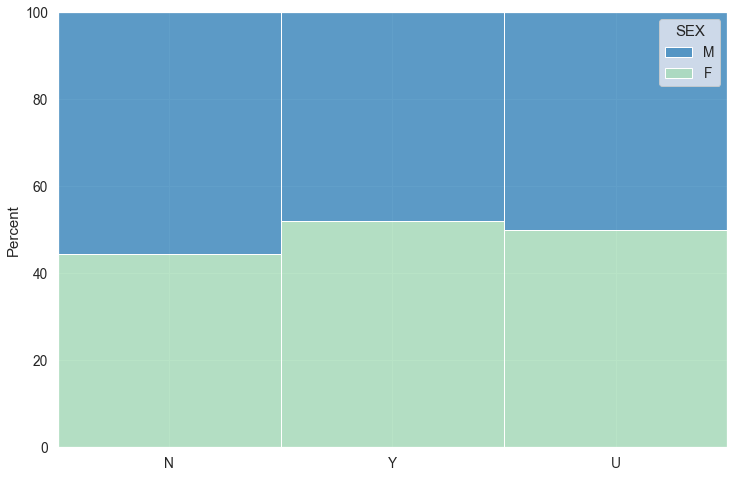

In [64]:
ax = sns.histplot(x = df.FDEAD,
                 hue= df.SEX,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_SEX
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='count', ylabel='FDEADC'>

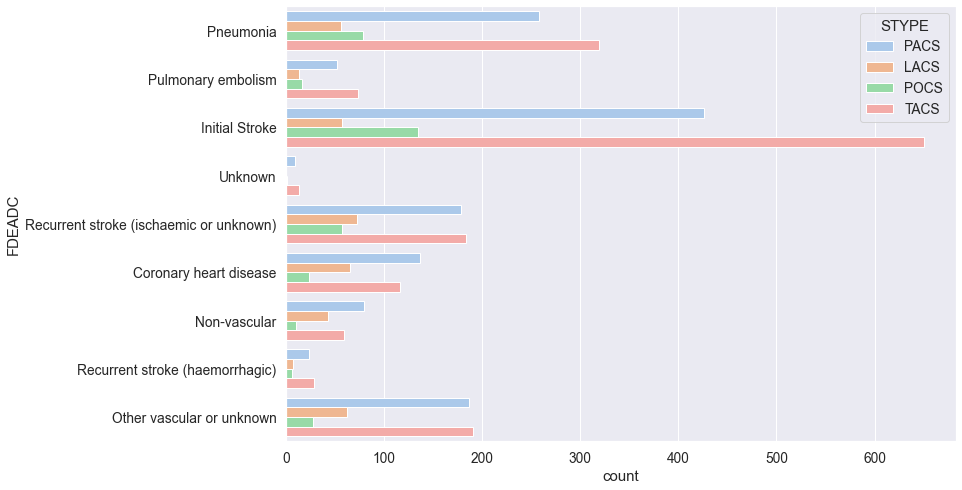

In [65]:
sns.countplot(y = df.FDEADC, hue = df.STYPE)

In [66]:
df.FDEADC.unique()

array([nan, 'Pneumonia', 'Pulmonary embolism', 'Initial Stroke',
       'Unknown', 'Recurrent stroke (ischaemic or unknown)',
       'Coronary heart disease', 'Non-vascular',
       'Recurrent stroke (haemorrhagic)', 'Other vascular or unknown'],
      dtype=object)

In [67]:
ax = sns.histplot(x = df.FDEADC,
                 hue= df.STYPE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_STYPE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [ ]:
sns.countplot(y = df.FDEADC, hue = df.AGE_bin.sort_values())

In [ ]:
ax = sns.histplot(x = df.FDEADC,
                 hue= df.AGE_bin,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_AGE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

In [ ]:
ax = sns.histplot(y = df.TREAT14,
                 hue= df.DDEAD,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Percent")
ax.set(ylabel="Treatment after first stroke")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['suspended', 'successful', ' live','failed', 'canceled'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

In [ ]:
ax = sns.histplot(y = df.TREAT14,
                 hue= df.FDEAD,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Percent")
ax.set(ylabel="Treatment after first stroke")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['suspended', 'successful', ' live','failed', 'canceled'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

In [72]:
ax = sns.histplot(y = df.FDEADC,
                 hue= df.TREAT14,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Percent")
ax.set(ylabel="Cause of death (6 months)")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['suspended', 'successful', ' live','failed', 'canceled'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [ ]:
sns.countplot(x = df.FRECOVER, hue = df.STYPE)

In [ ]:
ax = sns.histplot(x = df.FRECOVER,
                 hue= df.STYPE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_STYPE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

In [ ]:
sns.countplot(x = df.FRECOVER, hue = df.AGE_bin.sort_values())

In [76]:
#df['FPLACE'].replace({'A': 'Home', 'B': 'Relatives home', 'C': 'Residential care', 'D': 'Nursing home', 'E': 'Other hospital departments', 'U': 'Unknown'}, inplace=True)

<AxesSubplot:xlabel='count', ylabel='FPLACE'>

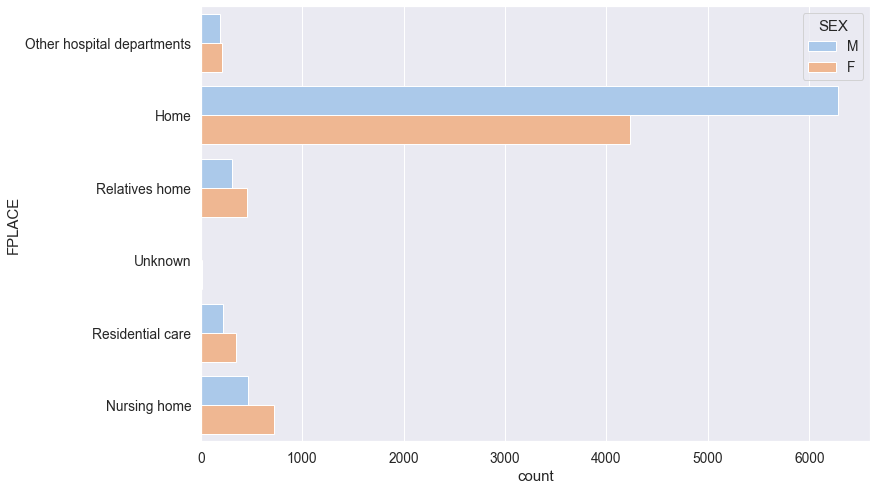

In [77]:
sns.countplot(y = df.FPLACE, hue = df.SEX)

<AxesSubplot:xlabel='count', ylabel='FPLACE'>

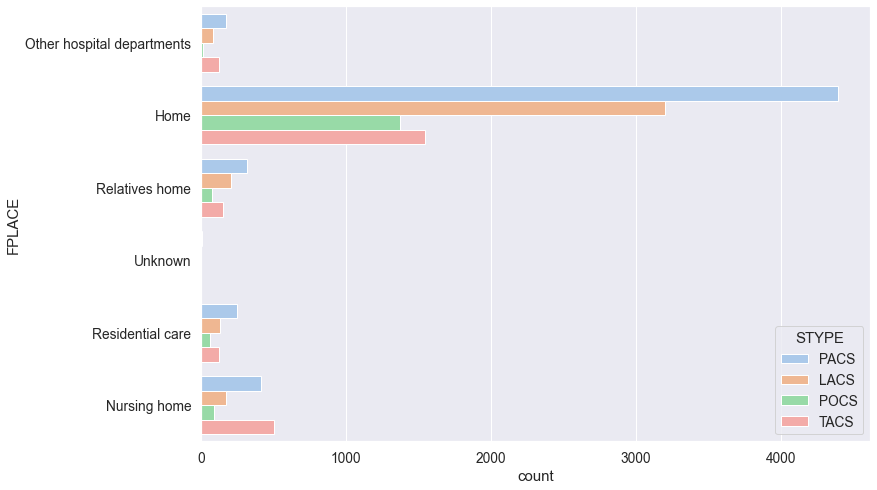

In [78]:
sns.countplot(y = df.FPLACE, hue = df.STYPE)

<AxesSubplot:xlabel='count', ylabel='FPLACE'>

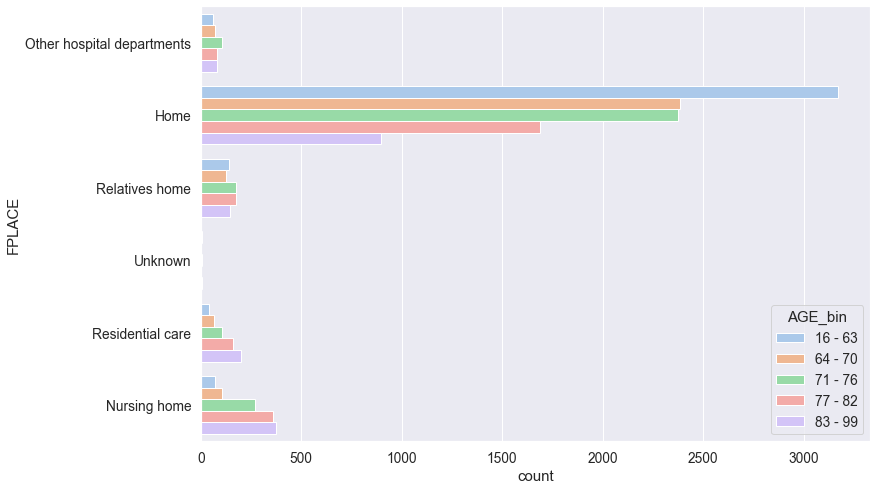

In [79]:
sns.countplot(y = df.FPLACE, hue = df.AGE_bin.sort_values())

<AxesSubplot:xlabel='FAP', ylabel='count'>

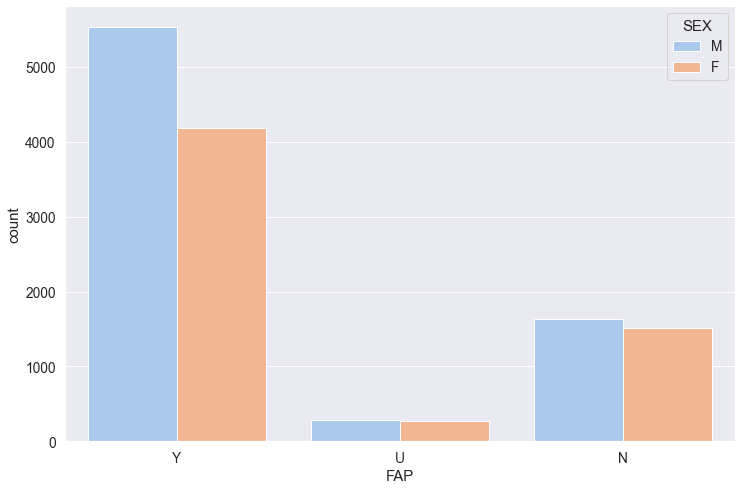

In [80]:
sns.countplot(x = df.FAP.sort_values(ascending=False), hue = df.SEX)

<AxesSubplot:xlabel='FOAC', ylabel='count'>

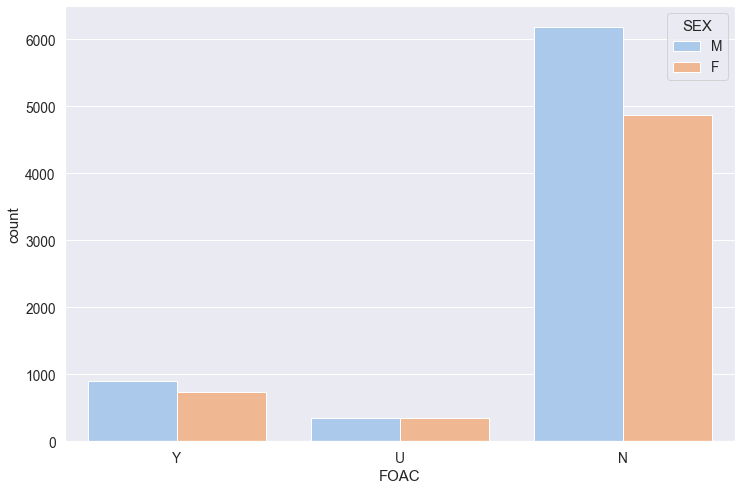

In [81]:
sns.countplot(x = df.FOAC.sort_values(ascending=False), hue = df.SEX)

In [82]:
#df['OCCODE'].replace({1: 'Dead', 2: 'Dependent', 3: 'Not recovered', 4: 'Recovered', 0: 'Unknown'}, inplace=True)

<ipython-input-183-e4cc9937ed27>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


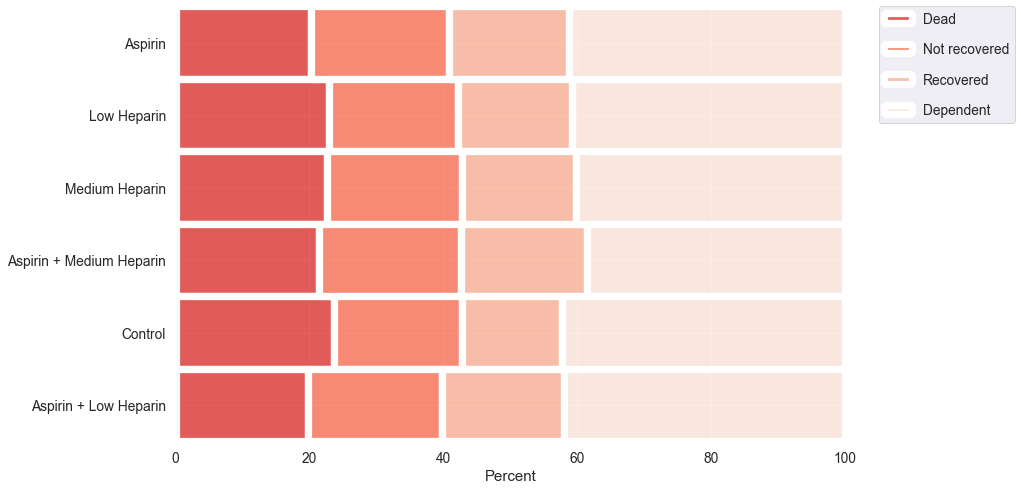

In [183]:
ax = sns.histplot(y = df.TREAT14,
                 hue= df.OCCODE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_OCCODE
                 )
ax.set(ylabel="")
ax.set(xlabel="Percent")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)
#ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
        labels = ['Dead', 'Not recovered', 'Recovered', 'Dependent'], labelspacing=1.2)

#plt.savefig("images/treat_perc_occode.png", bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='count', ylabel='OCCODE'>

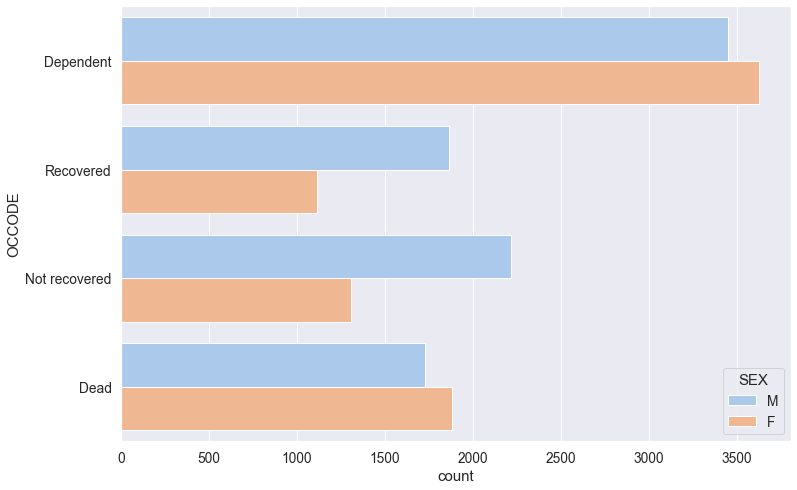

In [83]:
sns.countplot(y = df.OCCODE, hue = df.SEX)

<ipython-input-84-843e8f374aeb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


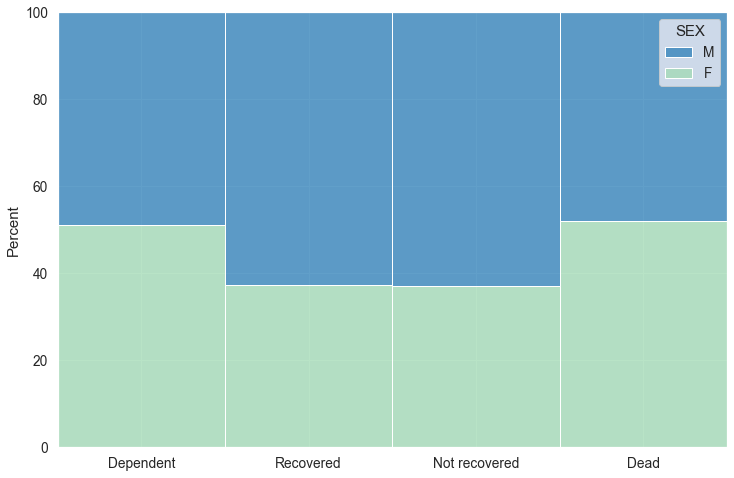

In [84]:
ax = sns.histplot(x = df.OCCODE,
                 hue= df.SEX,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_SEX
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

<ipython-input-85-6708c0ea3a45>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


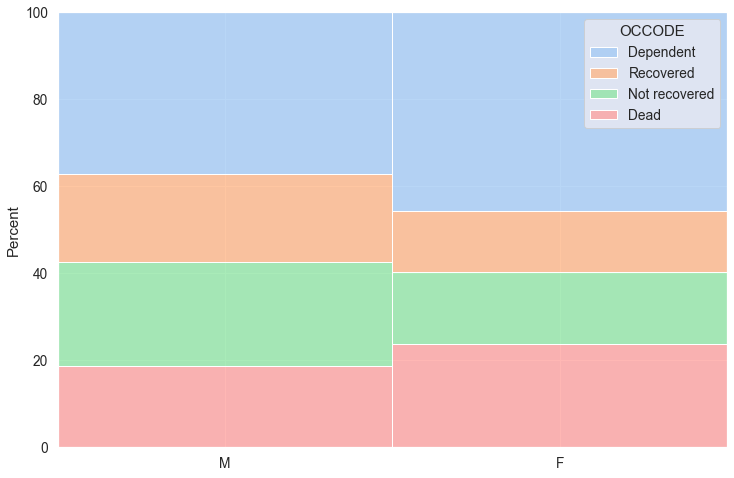

In [85]:
ax = sns.histplot(x = df.SEX,
                 hue= df.OCCODE,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_SEX
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='count', ylabel='OCCODE'>

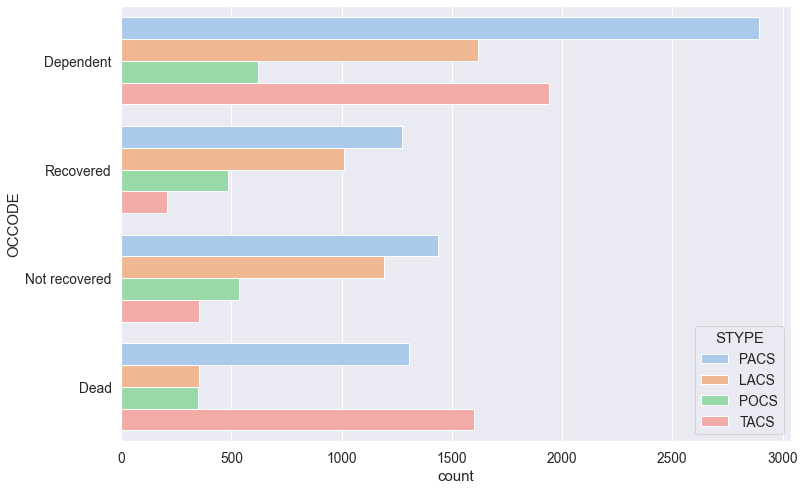

In [86]:
sns.countplot(y = df.OCCODE, hue = df.STYPE)

<ipython-input-87-b23251708c65>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


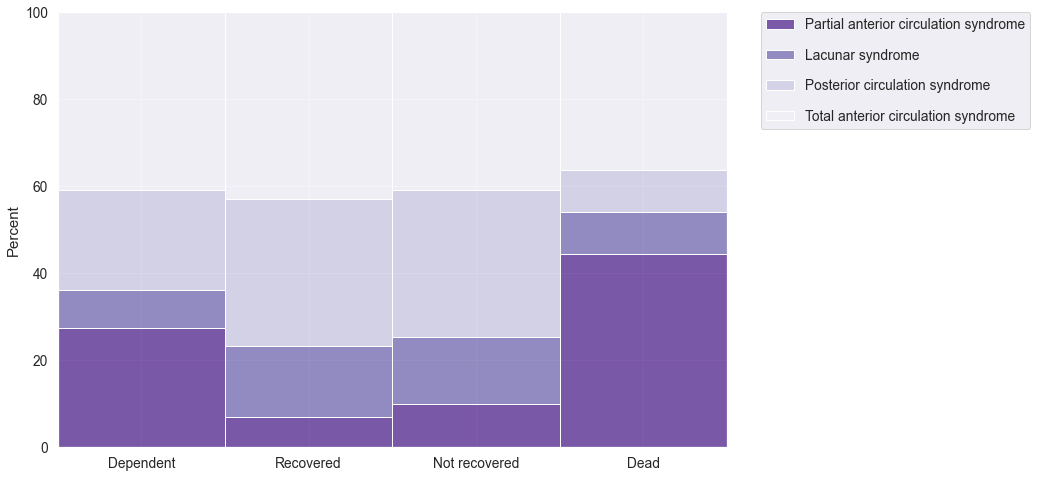

In [87]:
ax = sns.histplot(x = df.OCCODE,
                 hue= df.STYPE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_STYPE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='count', ylabel='OCCODE'>

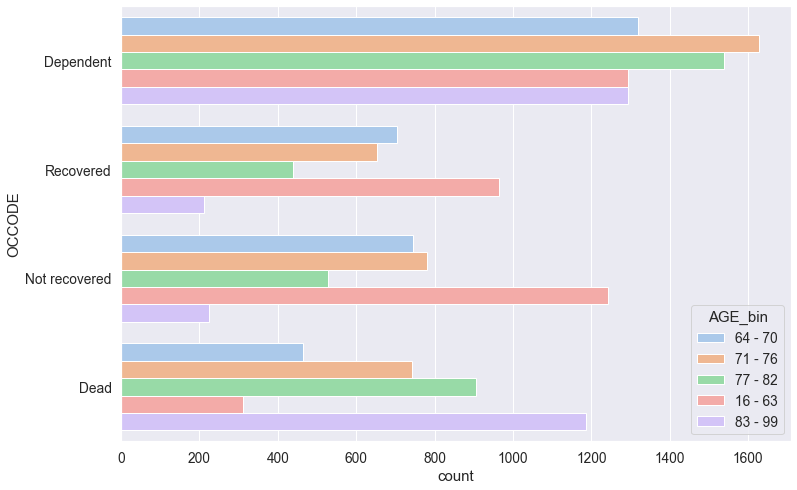

In [88]:
sns.countplot(y = df.OCCODE, hue = df.AGE_bin)

<ipython-input-89-7b63aed0734c>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


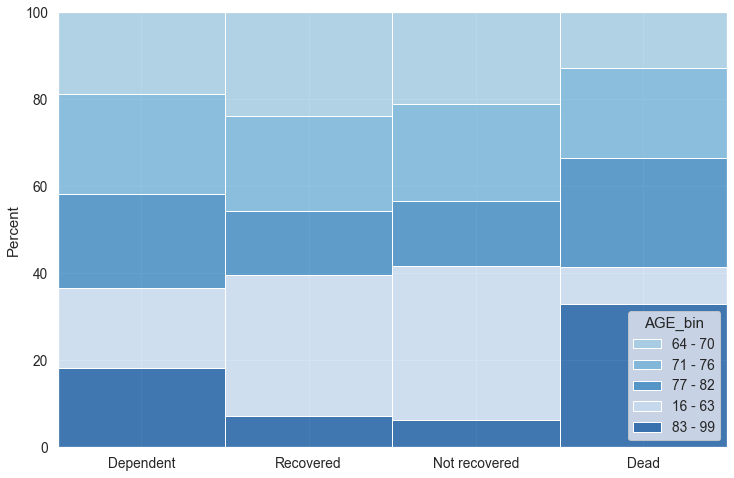

In [89]:
ax = sns.histplot(x = df.OCCODE,
                 hue= df.AGE_bin,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_AGE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='count', ylabel='DEAD'>

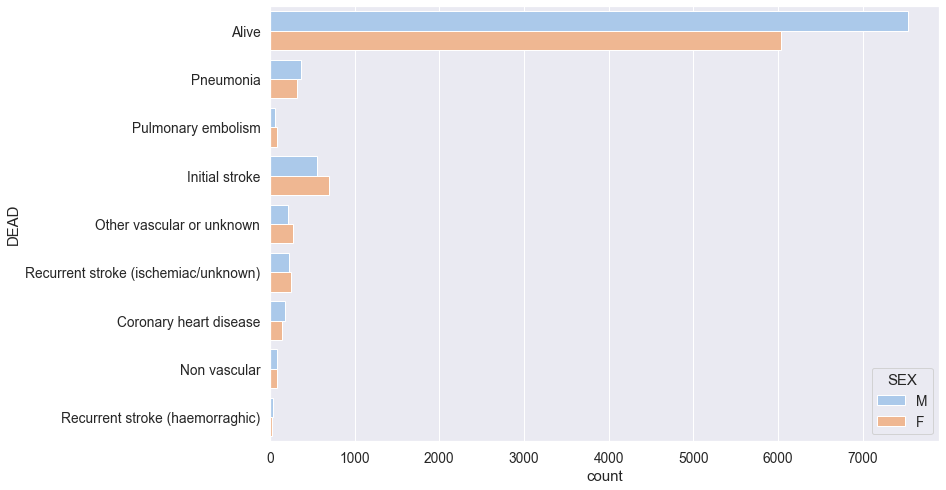

In [90]:
sns.countplot(y = df.DEAD, hue = df.SEX)

<ipython-input-91-b53a8d8b3c5e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


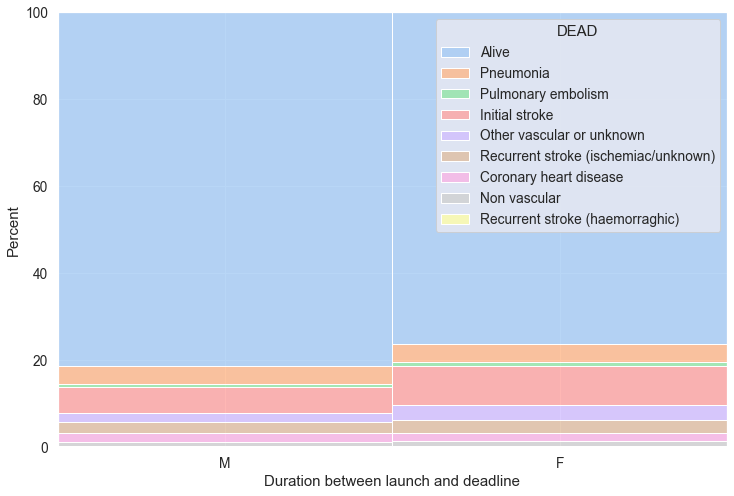

In [91]:
ax = sns.histplot(x = df.SEX,
                 hue= df.DEAD,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Duration between launch and deadline")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['suspended', 'successful', ' live','failed', 'canceled'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

In [92]:
df.SEX.value_counts()
group1 = df.query('DEAD == "Alive"').groupby('DEAD')

m_count = df.SEX.value_counts()[0] # total number of male patients
f_count = df.SEX.value_counts()[1] # total number of male patients

m_alive = group1['SEX'].value_counts()[0] # number of male patients alive after 6 months
f_alive = group1['SEX'].value_counts()[1] # number of female patients alive after 6 months

print(round((m_alive / m_count * 100),2)) # percentage of male patients being alive after 6 months
print(round((f_alive / f_count * 100),2)) # percentage of male patients being alive after 6 months


81.34
76.25


In [93]:
df_dead = df.loc[df['DEAD'] != 'Alive']

<ipython-input-94-6b5ccefbde4f>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


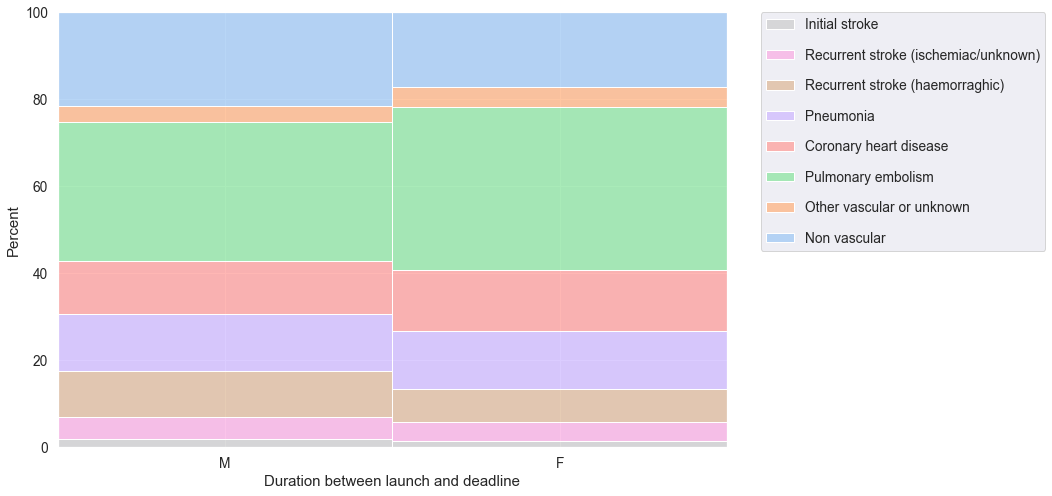

In [94]:
ax = sns.histplot(x = df_dead.SEX,
                 hue= df_dead.DEAD.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Duration between launch and deadline")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

#labels are nor correct!!
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
           labels = ['Initial stroke','Recurrent stroke (ischemiac/unknown)', 'Recurrent stroke (haemorraghic)', 
           'Pneumonia', 'Coronary heart disease', 'Pulmonary embolism', 'Other vascular or unknown', 'Non vascular'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

In [95]:
df_alive = df.loc[df['DEAD'] == 'Alive']

In [96]:
df_alive.OCCODE.value_counts()

Dependent        7072
Not recovered    3521
Recovered        2974
Name: OCCODE, dtype: int64

In [97]:
group2 = df.query('OCCODE == "Dependent"').groupby('SEX')
print(group2['FPLACE'].value_counts())


SEX  FPLACE                    
F    Home                          2069
     Nursing home                   692
     Relatives home                 315
     Residential care               284
     Other hospital departments     197
     Unknown                         10
M    Home                          2436
     Nursing home                   452
     Relatives home                 188
     Other hospital departments     170
     Residential care               144
     Unknown                          5
Name: FPLACE, dtype: int64


In [98]:
group3 = df.query('OCCODE == "Not recovered"').groupby('SEX')
print(group3['FPLACE'].value_counts())

SEX  FPLACE                    
F    Home                          1162
     Relatives home                  80
     Residential care                33
     Nursing home                    18
     Other hospital departments      10
     Unknown                          1
M    Home                          2070
     Relatives home                  82
     Residential care                45
     Other hospital departments      11
     Nursing home                     9
Name: FPLACE, dtype: int64


In [99]:
group4 = df.query('OCCODE == "Recovered"').groupby('SEX')
print(group4['FPLACE'].value_counts())

SEX  FPLACE                    
F    Home                           999
     Relatives home                  61
     Residential care                35
     Nursing home                    10
     Other hospital departments       5
     Unknown                          1
M    Home                          1780
     Relatives home                  36
     Residential care                30
     Other hospital departments      10
     Nursing home                     5
     Unknown                          2
Name: FPLACE, dtype: int64


<ipython-input-100-68f573c18042>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


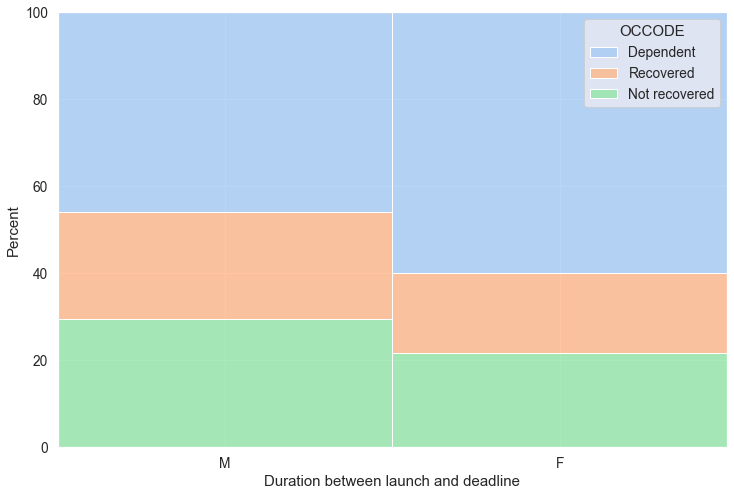

In [100]:
ax = sns.histplot(x = df_alive.SEX,
                 hue= df_alive.OCCODE.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Duration between launch and deadline")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

#labels are nor correct!!
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['Initial stroke','Recurrent stroke (ischemiac/unknown)', 'Recurrent stroke (haemorraghic)', 
#           'Pneumonia', 'Coronary heart disease', 'Pulmonary embolism', 'Other vascular or unknown', 'Non vascular'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

<ipython-input-101-6449403f472a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


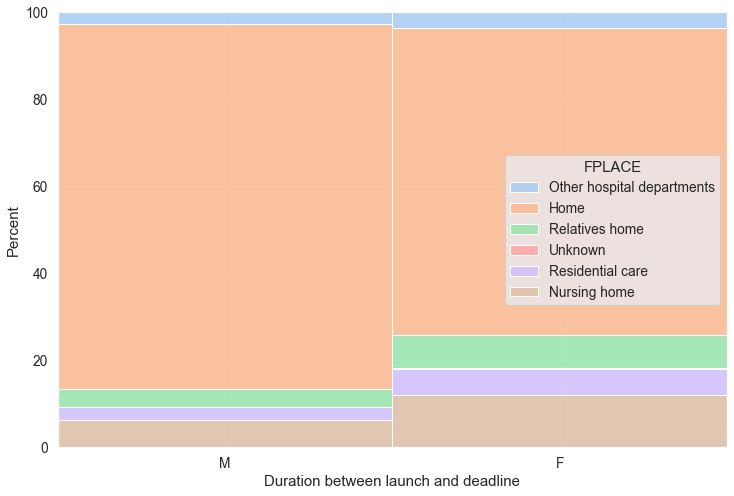

In [101]:
ax = sns.histplot(x = df_alive.SEX,
                 hue= df_alive.FPLACE.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Duration between launch and deadline")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

#labels are nor correct!!
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['Initial stroke','Recurrent stroke (ischemiac/unknown)', 'Recurrent stroke (haemorraghic)', 
#           'Pneumonia', 'Coronary heart disease', 'Pulmonary embolism', 'Other vascular or unknown', 'Non vascular'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

<ipython-input-102-bb543009419d>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


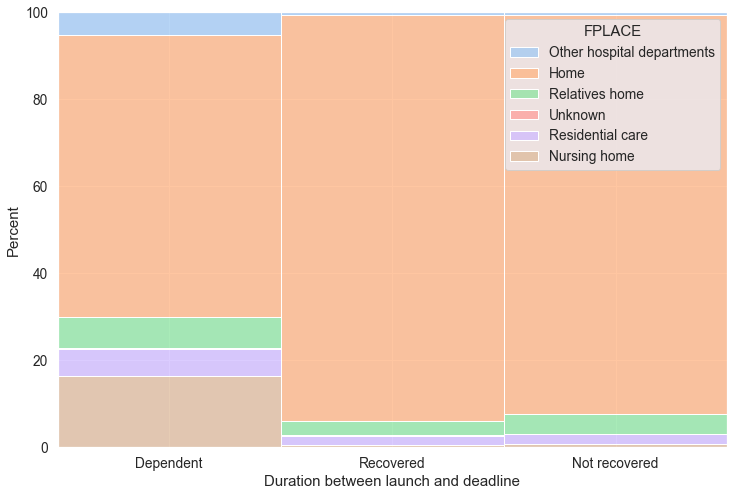

In [102]:
ax = sns.histplot(x = df_alive.OCCODE,
                 hue= df_alive.FPLACE.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Duration between launch and deadline")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

#labels are nor correct!!
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['Initial stroke','Recurrent stroke (ischemiac/unknown)', 'Recurrent stroke (haemorraghic)', 
#           'Pneumonia', 'Coronary heart disease', 'Pulmonary embolism', 'Other vascular or unknown', 'Non vascular'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()